# Data Collection

In [292]:
from bs4 import BeautifulSoup as bs
import requests
import time
import sys
import pandas as pd
import numpy as np
import re
import datetime

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_ads_urls():
    urls_list = []
    basic_url = "https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre?mpr=500000000&o="
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    for i in range(1, 250):
        url = basic_url + str(i)
        print(f"Scraping page {i}: {url}")
        try:
            r = requests.get(url, headers=headers)
            r.raise_for_status()
            soup = BeautifulSoup(r.text, "lxml")

            ads = soup.findAll('div', {'class': 'sc-1nre5ec-1 crKvIr listing'})
            print(f"Nombre d'annonces trouvées sur la page {i}: {len(ads)}")
            for div in ads:
                a = div.find('a', href=True)
                if a and a.get('href'):
                    urls_list.append(a.get('href'))

            time.sleep(3)  # Pause pour éviter le blocage
        except Exception as e:
            print(f"Erreur lors du scraping de la page {i}: {e}")
            time.sleep(10)

    df = pd.DataFrame(data={"url": urls_list})
    df.to_csv("ads_urls.csv", sep=',', index=False)
    print(f"Scraping terminé. {len(urls_list)} URLs collectées.")

get_ads_urls()


In [ ]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_ads_urls():
    urls_list = []
    basic_url = "https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre?mpr=500000000&o="
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    for i in range(1, 250):  # Boucle sur toutes les pages
        url = basic_url + str(i)
        print(f"Scraping page {i}: {url}")
        try:
            # Envoyer une requête HTTP GET
            r = requests.get(url, headers=headers)
            r.raise_for_status()  # Vérifier si la requête a réussi
            soup = BeautifulSoup(r.text, "lxml")

            # Trouver toutes les balises <a> qui contiennent les URLs d'annonces
            ads = soup.find_all('a', {'class': 'sc-1jge648-0 jZxFrL'})
            print(f"Nombre d'annonces trouvées sur la page {i}: {len(ads)}")

            # Extraire les URLs de chaque annonce
            for a in ads:
                href = a.get('href')
                if href:
                    urls_list.append(href)

            time.sleep(3)  # Pause pour éviter de se faire bloquer
        except Exception as e:
            print(f"Erreur lors du scraping de la page {i}: {e}")
            time.sleep(10)

    # Enregistrer les URLs dans un fichier CSV
    df = pd.DataFrame(data={"url": urls_list})
    df.to_csv("ads_urls.csv", sep=',', index=False)
    print(f"Scraping terminé. {len(urls_list)} URLs collectées.")

# Appeler la fonction
get_ads_urls()

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_ads_urls():
    urls_list = []
    basic_url = "https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre?mpr=500000000&o="
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    for i in range(1, 250):  # Boucle sur toutes les pages
        url = basic_url + str(i)
        print(f"Scraping page {i}: {url}")
        try:
            # Envoyer une requête HTTP GET
            r = requests.get(url, headers=headers)
            r.raise_for_status()  # Vérifier si la requête a réussi
            soup = BeautifulSoup(r.text, "lxml")

            # 1. Trouver toutes les balises <div> de la classe 'sc-1nre5ec-1 crKvIr listing' (qui contiennent 2 <a>)
            listings = soup.find_all('div', {'class': 'sc-1nre5ec-1 crKvIr listing'})

            for listing in listings:
                # Extraire les deux URLs dans chaque <div> de la classe 'sc-1nre5ec-1 crKvIr listing'
                a_tags = listing.find_all('a', href=True)
                for a in a_tags:
                    urls_list.append(a['href'])

            # 2. Trouver les autres <div> de classe 'sc-b57yxx-1 kBlnTB' qui contiennent encore deux autres <a>
            additional_listings = soup.find_all('div', {'class': 'sc-b57yxx-1 kBlnTB'})

            for additional in additional_listings:
                a_tags = additional.find_all('a', href=True)
                for a in a_tags:
                    urls_list.append(a['href'])

            time.sleep(3)  # Pause pour éviter de se faire bloquer
        except Exception as e:
            print(f"Erreur lors du scraping de la page {i}: {e}")
            time.sleep(10)

    # Enregistrer les URLs dans un fichier CSV
    df = pd.DataFrame(data={"url": urls_list})
    df.to_csv("ads_urls1.csv", sep=',', index=False)
    print(f"Scraping terminé. {len(urls_list)} URLs collectées.")

# Appeler la fonction
get_ads_urls()

In [17]:
import requests
from bs4 import BeautifulSoup

def scrap_car_data(ad_url):
    # Ajouter des headers pour éviter le blocage
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    try:
        # Faire la requête HTTP avec les headers
        r = requests.get(ad_url, headers=headers)
        r.raise_for_status()  # Vérifie si la requête a réussi

        # Parser le contenu HTML de la page
        soup = BeautifulSoup(r.text, "html.parser")

        # Initialiser un dictionnaire pour stocker les informations de la voiture
        car_data = {}

        # Extraire le prix de la voiture
        price_tag = soup.find("p", {"class": "sc-1x0vz2r-0 lnEFFR sc-1g3sn3w-13 czygWQ"})
        if price_tag:
            car_data['price'] = price_tag.get_text(strip=True)

        # Extraire l'année de la voiture
        year_tag = soup.find("span", {"class": "sc-1x0vz2r-0 kQHNss"})
        if year_tag:
            car_data['year'] = year_tag.get_text(strip=True)

        # Extraire d'autres informations sur la voiture
        other_info_tags = soup.find_all("span", {"class": "sc-1x0vz2r-0 gSLYtF"})
        other_info = [tag.get_text(strip=True) for tag in other_info_tags]
        car_data['other_info'] = other_info

        # Extraire les informations spécifiques du <div> avec la classe "sc-6p5md9-1 ksqQXN"
        specific_info_div = soup.find("div", {"class": "sc-6p5md9-0 dsWaSi"})
        specific_info = []
        if specific_info_div:
            span_tags = specific_info_div.find_all("span", {"class": "sc-1x0vz2r-0 kQHNss"})
            specific_info = [span.get_text(strip=True) for span in span_tags]
        car_data['specific_info'] = specific_info  # Ajouter les infos spécifiques sous une nouvelle clé

        return car_data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête pour l'URL {ad_url}: {e}")
        return None

# Exemple d'utilisation
ad_url = "https://www.avito.ma/fr/anfa/voitures_d'occasion/Citroen_C3_Shine_Diesel_Manuelle_2018_%C3%A0_Casablanca_55850634.htm"  # Remplacez par une URL valide
car_data = scrap_car_data(ad_url)
if car_data:
    print(car_data)

{'price': '137\u202f000 DH', 'year': '2018', 'other_info': ["Voitures d'occasion, à vendre", 'Anfa', '35 000 - 39 999', 'Citroen', 'C3', '5', 'WW au Maroc', 'Oui', '6 CV', 'Excellent'], 'specific_info': ['2018', 'Manuelle', 'Diesel']}


In [10]:
import csv

In [9]:
def write_data_to_csv(data):
    with open("/output.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(data)

In [11]:
urls_data = pd.read_csv("ads_urls.csv")
# create  a list that will hold the final data
final_result = []
i = 1
# loop over the dataframe
for _, row in urls_data.iterrows():
    print(row)  # Afficher le contenu de chaque ligne
    final_result.append(scrap_car_data(row['url']))
    i += 1
    # to count how many page we have processed since qe have 35 links per page


    print("page ",i, "done")
print('Scrapping data finished')
# now that we have all the data we can write it in a csv file
write_data_to_csv(final_result)# read the saved urls file as a dataframe


url    https://www.avito.ma/fr/anfa/voitures_d'occasi...
Name: 0, dtype: object


NameError: name 'scrap_ad_data' is not defined

In [2]:
def read_urls_from_csv(filename):
    # Charger le fichier CSV contenant les URLs
    import pandas as pd
    df = pd.read_csv(filename)
    return df['url'].tolist()  # Assurez-vous que la colonne des URLs s'appelle 'url'

In [3]:
def write_data_to_csv(data, filename): # Add filename as an argument
    with open(filename, "w", newline='', encoding='utf-8') as f: # Use the filename argument
        writer = csv.writer(f)
        writer.writerows(data)

In [15]:
# Exemple d'utilisation :
urls_list = read_urls_from_csv('ads_urls.csv')  # Remplacez par le nom de votre fichier CSV
final_result = []

for ad_url in urls_list:
    car_data = scrap_car_data(ad_url)
    if car_data:
        final_result.append(car_data)

# Sauvegarder les résultats dans un fichier CSV
write_data_to_csv(final_result, 'car_data_output.csv')
print("Scrapping terminé et données sauvegardées dans 'car_data_output.csv'")

KeyboardInterrupt: 

In [4]:
import requests
from bs4 import BeautifulSoup

def scrap_ad_data(ad_url):
    r = requests.get(ad_url)
    soup = BeautifulSoup(r.text, "html.parser")

    # Recherche de l'année modèle, kilométrage et carburant
    year_model = soup.find('span', string='Année modèle').find_next('span').text.strip() if soup.find('span', string='Année modèle') else None
    mileage = soup.find('span', string='Kilométrage').find_next('span').text.strip() if soup.find('span', string='Kilométrage') else None
    fuel_type = soup.find('span', string='Carburant').find_next('span').text.strip() if soup.find('span', string='Carburant') else None

    # Affichage des valeurs récupérées ou des valeurs par défaut
    print(f"Année modèle: {year_model}")
    print(f"Kilométrage: {mileage}")
    print(f"Carburant: {fuel_type}")

    return year_model, mileage, fuel_type

# Exemple d'appel de la fonction
ad_url = "https://www.avito.ma/fr/centre_ville/voitures_d'occasion/Dacia_Logan_model_2021_53618744.htm"

scrap_ad_data(ad_url)

Année modèle: None
Kilométrage: None
Carburant: None


(None, None, None)

In [18]:
from datetime import datetime
urls_list = read_urls_from_csv("C:/Users/HA/Downloads/ads_urls (1).csv")  # Replace with your CSV file name
final_result = []

for ad_url in urls_list:
    car_data = scrap_car_data(ad_url)
    if car_data:
        car_data['timestamp'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Scrapped {ad_url} at {car_data['timestamp']}")
        final_result.append(car_data)



Scrapped https://www.avito.ma/fr/anfa/voitures_d'occasion/fiat_500_55822310.htm at 2024-12-06 15:01:16
Scrapped https://www.avito.ma/fr/hay_al_falah/voitures_d'occasion/FIAT_PANDA_2019_55808780.htm at 2024-12-06 15:01:17
Scrapped https://www.avito.ma/fr/autre_secteur/voitures_d'occasion/KIFAL___DACIA_Dokker_55854575.htm at 2024-12-06 15:01:17
Scrapped https://www.avito.ma/fr/autre_secteur/voitures_d'occasion/KIFAL___LAND_ROVER_Evoque_55854572.htm at 2024-12-06 15:01:18
Scrapped https://www.avito.ma/fr/aïn_chock/voitures_d'occasion/Audi_A3_S_Line_2021__55215813.htm at 2024-12-06 15:01:18
Scrapped https://www.avito.ma/fr/autre_secteur/voitures_d'occasion/KIFAL___LAND_ROVER_Evoque_55854571.htm at 2024-12-06 15:01:19
Scrapped https://www.avito.ma/fr/anfa/voitures_d'occasion/Jeep_Wrangler_2022_54581254.htm at 2024-12-06 15:01:20
Scrapped https://www.avito.ma/fr/route_ain_chkaf/voitures_d'occasion/Peugeot_2008_bva_allure_54773891.htm at 2024-12-06 15:01:20
Scrapped https://www.avito.ma/fr/ma

In [19]:
final_result

[{'price': '125\u202f000 DH',
  'year': '2022',
  'other_info': ["Voitures d'occasion, à vendre",
   'Anfa',
   '60 000 - 64 999',
   'Fiat',
   '500',
   '5',
   'WW au Maroc',
   'Oui',
   '7 CV',
   'Excellent'],
  'specific_info': ['2022', 'Automatique', 'Essence'],
  'timestamp': '2024-12-06 15:01:16'},
 {'year': '2019',
  'other_info': ["Voitures d'occasion, à vendre",
   'Hay Al Falah',
   '100 000 - 109 999',
   'Fiat',
   'Panda',
   '5',
   'WW au Maroc',
   'Oui',
   '5 CV',
   'Excellent'],
  'specific_info': ['2019', 'Manuelle', 'Essence'],
  'timestamp': '2024-12-06 15:01:17'},
 {'price': '140\u202f000 DH',
  'year': '2019',
  'other_info': ["Voitures d'occasion, à vendre",
   'Autre secteur',
   '70 000 - 74 999',
   'Dacia',
   'Dokker',
   '6 CV'],
  'specific_info': ['2019', 'Diesel'],
  'timestamp': '2024-12-06 15:01:17'},
 {'price': '255\u202f000 DH',
  'year': '2017',
  'other_info': ["Voitures d'occasion, à vendre",
   'Autre secteur',
   '110 000 - 119 999',
   '

In [66]:
len(final_result)

8714

In [11]:
def write_results_to_csv(results, output_filename):
    """Write the final results to a CSV file, separating `other_info` items into individual columns."""
    # Determine the maximum number of columns in `other_info`
    max_other_info_len = max(len(result.get('other_info', [])) for result in results)
    
    # Create the header
    header = ['price', 'year'] + [f'other_info_{i+1}' for i in range(max_other_info_len)] + ['timestamp']
    
    # Write data to CSV
    with open(output_filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write the header row
        writer.writerow(header)
        
        # Write data rows
        for result in results:
            row = [
                result.get('price', ''),  # Default to empty string if 'price' is missing
                result.get('year', ''),  # Default to empty string if 'year' is missing
                *result.get('other_info', []),  # Spread `other_info` list into separate columns
                result.get('timestamp', '')  # Default to empty string if 'timestamp' is missing
            ]
            # Pad the row with empty strings if `other_info` has fewer items than the max length
            row += [''] * (max_other_info_len - len(result.get('other_info', [])))
            writer.writerow(row)

# Save `final_result` to a CSV file
write_results_to_csv(final_result, 'car_data_output.csv')
print("Data saved to 'car_data_output.csv'")

Data saved to 'car_data_output.csv'


In [67]:
normalized_data = []
for item in final_result:
    # Extraire les éléments des listes
    other_info_columns = {f'other_info_{i+1}': v for i, v in enumerate(item.get('other_info', []))}
    specific_info_columns = {f'specific_info_{i+1}': v for i, v in enumerate(item.get('specific_info', []))}
    
    # Combiner toutes les données
    flattened_item = {**item, **other_info_columns, **specific_info_columns}
    
    # Supprimer les colonnes originales en liste
    flattened_item.pop('other_info', None)
    flattened_item.pop('specific_info', None)
    
    normalized_data.append(flattened_item)

# Identifier toutes les colonnes
all_columns = set()
for item in normalized_data:
    all_columns.update(item.keys())
all_columns = list(all_columns)

# Écrire le fichier CSV
csv_filename = 'output_car.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=all_columns)
    writer.writeheader()
    writer.writerows(normalized_data)

print(f"Données exportées vers le fichier CSV : {csv_filename}")

Données exportées vers le fichier CSV : output_car.csv


In [69]:
output_file = 'car_data.csv'

# Define the target columns
columns = ['prix', 'année_du_modèle', 'kilométrage', 'type_de_carburant', 'marque', 'modèle', 'puissance_fiscale', 'secteur', 'type', 'ville']

# Process data and map to required columns
processed_data = []
for car in final_result:
    try:
        processed_row = {
            'prix': car['price'],  # Clean the price
            'année_du_modèle': car['year'],
            'kilométrage': car['other_info'][2] if len(car['other_info']) > 2 else None,
            'type_de_carburant': car['specific_info'][2] if len(car['specific_info']) > 2 else None,
            'marque': car['other_info'][3] if len(car['other_info']) > 3 else None,
            'modèle': car['other_info'][4] if len(car['other_info']) > 4 else None,
            'puissance_fiscale': car['other_info'][8] if len(car['other_info']) > 8 else None,
            'secteur': car['other_info'][1] if len(car['other_info']) > 1 else None,
            'type': car['other_info'][0] if len(car['other_info']) > 0 else None,
            'ville': car['other_info'][1] if len(car['other_info']) > 1 else None,
        }
        processed_data.append(processed_row)
    except Exception as e:
        print(f"Error processing car data: {e}")

# Write to CSV
try:
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=columns)
        writer.writeheader()  # Write the header row
        writer.writerows(processed_data)  # Write all car data
    print(f"Data successfully written to {output_file}")
except Exception as e:
    print(f"Error writing to CSV: {e}")

Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car data: 'price'
Error processing car

# Data cleaning and processing

In [442]:
file_path = 'output_car.csv'  # Remplacez par le chemin vers votre fichier
df = pd.read_csv(file_path)



In [443]:
df.head()

other_info_4 other_info_7        other_info_5            timestamp  \
0         Fiat  WW au Maroc                 500  2024-12-06 15:01:16   
1         Fiat  WW au Maroc               Panda  2024-12-06 15:01:17   
2        Dacia          NaN              Dokker  2024-12-06 15:01:17   
3   Land Rover          NaN  Range Rover Evoque  2024-12-06 15:01:18   
4         Audi  WW au Maroc                  A3  2024-12-06 15:01:18   

  other_info_6 other_info_10 specific_info_1  year   other_info_2       price  \
0            5     Excellent            2022  2022           Anfa  125 000 DH   
1            5     Excellent            2019  2019   Hay Al Falah         NaN   
2         6 CV           NaN            2019  2019  Autre secteur  140 000 DH   
3         8 CV           NaN            2017  2017  Autre secteur  255 000 DH   
4            5     Excellent            2021  2021      Aïn Chock         NaN   

  specific_info_2 other_info_9                   other_info_1 specific_info_3  \
0     Automatique         7 CV  Voitures d'occasion, à vendre         Essence   
1        Manuelle         5 CV  Voitures d'occasion, à vendre         Essence   
2          Diesel          NaN  Voitures d'occasion, à vendre             NaN   
3          Diesel          NaN  Voitures d'occasion, à vendre             NaN   
4     Automatique         8 CV  Voitures d'occasion, à vendre          Diesel   

        other_info_3 other_info_8  
0    60 000 - 64 999          Oui  
1  100 000 - 109 999          Oui  
2    70 000 - 74 999          NaN  
3  110 000 - 119 999          NaN  
4    90 000 - 94 999          Oui

In [444]:
df.columns = [
    "marque",
    "immatriculation",
    "modèle",
    "timestamp",
    "puissance_fiscale",
    "condition",
    "année_du_modèle",
    "specific_info_année",
    "secteur",
    "prix",
    "type_de_transmission",
    "puissance_fiscale_brute",
    "type",
    "type_de_carburant",
    "kilométrage",
    "disponibilité",
]

In [445]:
columns_to_keep = [
    "prix",
    "année_du_modèle",
    "kilométrage",
    "type_de_carburant",
    "marque",
    "modèle",
    "puissance_fiscale",
    "secteur",
    "type",
]

# Drop irrelevant columns
df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             8449 non-null   object
 1   modèle             8449 non-null   object
 2   puissance_fiscale  8449 non-null   object
 3   année_du_modèle    8458 non-null   object
 4   secteur            8468 non-null   object
 5   prix               5227 non-null   object
 6   type               8468 non-null   object
 7   type_de_carburant  8369 non-null   object
 8   kilométrage        8458 non-null   object
dtypes: object(9)
memory usage: 612.8+ KB


In [447]:
df

marque              modèle puissance_fiscale année_du_modèle  \
0           Fiat                 500                 5            2022   
1           Fiat               Panda                 5            2019   
2          Dacia              Dokker              6 CV            2019   
3     Land Rover  Range Rover Evoque              8 CV            2017   
4           Audi                  A3                 5            2021   
...          ...                 ...               ...             ...   
8709     Peugeot                 309                 5            1994   
8710     Renault                 R18              8 CV            1983   
8711         NaN                 NaN               NaN             NaN   
8712  Volkswagen              GOLF 7                 5            2015   
8713     Peugeot                 508              8 CV            2017   

             secteur        prix                           type  \
0               Anfa  125 000 DH  Voitures d'occasion, à vendre   
1       Hay Al Falah         NaN  Voitures d'occasion, à vendre   
2      Autre secteur  140 000 DH  Voitures d'occasion, à vendre   
3      Autre secteur  255 000 DH  Voitures d'occasion, à vendre   
4          Aïn Chock         NaN  Voitures d'occasion, à vendre   
...              ...         ...                            ...   
8709  Toute la ville   24 000 DH  Voitures d'occasion, à vendre   
8710       Abattoirs   15 000 DH  Voitures d'occasion, à vendre   
8711       Marjane 2   78 000 DH  Voitures d'occasion, à vendre   
8712   Hay Mohammadi  220 000 DH  Voitures d'occasion, à vendre   
8713       Aïn Chock  160 000 DH  Voitures d'occasion, à vendre   

     type_de_carburant        kilométrage  
0              Essence    60 000 - 64 999  
1              Essence  100 000 - 109 999  
2                  NaN    70 000 - 74 999  
3                  NaN  110 000 - 119 999  
4               Diesel    90 000 - 94 999  
...                ...                ...  
8709            Diesel    65 000 - 69 999  
8710            Diesel  180 000 - 189 999  
8711               NaN                NaN  
8712            Diesel  190 000 - 199 999  
8713            Diesel  150 000 - 159 999  

[8714 rows x 9 columns]

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             8449 non-null   object
 1   modèle             8449 non-null   object
 2   puissance_fiscale  8449 non-null   object
 3   année_du_modèle    8458 non-null   object
 4   secteur            8468 non-null   object
 5   prix               5227 non-null   object
 6   type               8468 non-null   object
 7   type_de_carburant  8369 non-null   object
 8   kilométrage        8458 non-null   object
dtypes: object(9)
memory usage: 612.8+ KB


In [449]:
df

marque              modèle puissance_fiscale année_du_modèle  \
0           Fiat                 500                 5            2022   
1           Fiat               Panda                 5            2019   
2          Dacia              Dokker              6 CV            2019   
3     Land Rover  Range Rover Evoque              8 CV            2017   
4           Audi                  A3                 5            2021   
...          ...                 ...               ...             ...   
8709     Peugeot                 309                 5            1994   
8710     Renault                 R18              8 CV            1983   
8711         NaN                 NaN               NaN             NaN   
8712  Volkswagen              GOLF 7                 5            2015   
8713     Peugeot                 508              8 CV            2017   

             secteur        prix                           type  \
0               Anfa  125 000 DH  Voitures d'occasion, à vendre   
1       Hay Al Falah         NaN  Voitures d'occasion, à vendre   
2      Autre secteur  140 000 DH  Voitures d'occasion, à vendre   
3      Autre secteur  255 000 DH  Voitures d'occasion, à vendre   
4          Aïn Chock         NaN  Voitures d'occasion, à vendre   
...              ...         ...                            ...   
8709  Toute la ville   24 000 DH  Voitures d'occasion, à vendre   
8710       Abattoirs   15 000 DH  Voitures d'occasion, à vendre   
8711       Marjane 2   78 000 DH  Voitures d'occasion, à vendre   
8712   Hay Mohammadi  220 000 DH  Voitures d'occasion, à vendre   
8713       Aïn Chock  160 000 DH  Voitures d'occasion, à vendre   

     type_de_carburant        kilométrage  
0              Essence    60 000 - 64 999  
1              Essence  100 000 - 109 999  
2                  NaN    70 000 - 74 999  
3                  NaN  110 000 - 119 999  
4               Diesel    90 000 - 94 999  
...                ...                ...  
8709            Diesel    65 000 - 69 999  
8710            Diesel  180 000 - 189 999  
8711               NaN                NaN  
8712            Diesel  190 000 - 199 999  
8713            Diesel  150 000 - 159 999  

[8714 rows x 9 columns]

In [450]:
df = df.dropna(subset=["prix"])

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5227 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             5215 non-null   object
 1   modèle             5215 non-null   object
 2   puissance_fiscale  5215 non-null   object
 3   année_du_modèle    5219 non-null   object
 4   secteur            5227 non-null   object
 5   prix               5227 non-null   object
 6   type               5227 non-null   object
 7   type_de_carburant  5135 non-null   object
 8   kilométrage        5219 non-null   object
dtypes: object(9)
memory usage: 408.4+ KB


In [452]:
df

marque              modèle puissance_fiscale année_du_modèle  \
0           Fiat                 500                 5            2022   
2          Dacia              Dokker              6 CV            2019   
3     Land Rover  Range Rover Evoque              8 CV            2017   
5     Land Rover  Range Rover Evoque              8 CV            2018   
6           Jeep            Wrangler                 5            2022   
...          ...                 ...               ...             ...   
8709     Peugeot                 309                 5            1994   
8710     Renault                 R18              8 CV            1983   
8711         NaN                 NaN               NaN             NaN   
8712  Volkswagen              GOLF 7                 5            2015   
8713     Peugeot                 508              8 CV            2017   

             secteur        prix                           type  \
0               Anfa  125 000 DH  Voitures d'occasion, à vendre   
2      Autre secteur  140 000 DH  Voitures d'occasion, à vendre   
3      Autre secteur  255 000 DH  Voitures d'occasion, à vendre   
5      Autre secteur  325 000 DH  Voitures d'occasion, à vendre   
6               Anfa  500 000 DH  Voitures d'occasion, à vendre   
...              ...         ...                            ...   
8709  Toute la ville   24 000 DH  Voitures d'occasion, à vendre   
8710       Abattoirs   15 000 DH  Voitures d'occasion, à vendre   
8711       Marjane 2   78 000 DH  Voitures d'occasion, à vendre   
8712   Hay Mohammadi  220 000 DH  Voitures d'occasion, à vendre   
8713       Aïn Chock  160 000 DH  Voitures d'occasion, à vendre   

     type_de_carburant        kilométrage  
0              Essence    60 000 - 64 999  
2                  NaN    70 000 - 74 999  
3                  NaN  110 000 - 119 999  
5                  NaN  110 000 - 119 999  
6              Essence    50 000 - 54 999  
...                ...                ...  
8709            Diesel    65 000 - 69 999  
8710            Diesel  180 000 - 189 999  
8711               NaN                NaN  
8712            Diesel  190 000 - 199 999  
8713            Diesel  150 000 - 159 999  

[5227 rows x 9 columns]

In [453]:
df1 = df[df.prix.str.contains("DH") == False]
df1

Empty DataFrame
Columns: [marque, modèle, puissance_fiscale, année_du_modèle, secteur, prix, type, type_de_carburant, kilométrage]
Index: []

In [454]:

# remove the 'DH' caracters from the price
df.prix = df.prix.map(lambda x: x.rstrip('DH'))
# remove the space on it


C:\Users\HA\AppData\Local\Temp\ipykernel_29604\1394609762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.prix = df.prix.map(lambda x: x.rstrip('DH'))


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5227 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             5215 non-null   object
 1   modèle             5215 non-null   object
 2   puissance_fiscale  5215 non-null   object
 3   année_du_modèle    5219 non-null   object
 4   secteur            5227 non-null   object
 5   prix               5227 non-null   object
 6   type               5227 non-null   object
 7   type_de_carburant  5135 non-null   object
 8   kilométrage        5219 non-null   object
dtypes: object(9)
memory usage: 408.4+ KB


In [456]:
df.prix = df.prix.str.replace(" ","")
# change it to integer value


C:\Users\HA\AppData\Local\Temp\ipykernel_29604\1701935617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.prix = df.prix.str.replace(" ","")


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5227 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             5215 non-null   object
 1   modèle             5215 non-null   object
 2   puissance_fiscale  5215 non-null   object
 3   année_du_modèle    5219 non-null   object
 4   secteur            5227 non-null   object
 5   prix               5227 non-null   object
 6   type               5227 non-null   object
 7   type_de_carburant  5135 non-null   object
 8   kilométrage        5219 non-null   object
dtypes: object(9)
memory usage: 408.4+ KB


In [458]:
df = df[~df['prix'].isin(['N/A', 'NaN', ''])]

# Clean up any non-numeric characters
df['prix'] = df['prix'].replace({' ': '', 'DH': '', ',': ''}, regex=True)

# Now convert to numeric
df['prix'] = pd.to_numeric(df['prix'], errors='coerce', downcast='integer')

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5227 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marque             5215 non-null   object
 1   modèle             5215 non-null   object
 2   puissance_fiscale  5215 non-null   object
 3   année_du_modèle    5219 non-null   object
 4   secteur            5227 non-null   object
 5   prix               5227 non-null   int32 
 6   type               5227 non-null   object
 7   type_de_carburant  5135 non-null   object
 8   kilométrage        5219 non-null   object
dtypes: int32(1), object(8)
memory usage: 387.9+ KB


In [460]:
df

marque              modèle puissance_fiscale année_du_modèle  \
0           Fiat                 500                 5            2022   
2          Dacia              Dokker              6 CV            2019   
3     Land Rover  Range Rover Evoque              8 CV            2017   
5     Land Rover  Range Rover Evoque              8 CV            2018   
6           Jeep            Wrangler                 5            2022   
...          ...                 ...               ...             ...   
8709     Peugeot                 309                 5            1994   
8710     Renault                 R18              8 CV            1983   
8711         NaN                 NaN               NaN             NaN   
8712  Volkswagen              GOLF 7                 5            2015   
8713     Peugeot                 508              8 CV            2017   

             secteur    prix                           type type_de_carburant  \
0               Anfa  125000  Voitures d'occasion, à vendre           Essence   
2      Autre secteur  140000  Voitures d'occasion, à vendre               NaN   
3      Autre secteur  255000  Voitures d'occasion, à vendre               NaN   
5      Autre secteur  325000  Voitures d'occasion, à vendre               NaN   
6               Anfa  500000  Voitures d'occasion, à vendre           Essence   
...              ...     ...                            ...               ...   
8709  Toute la ville   24000  Voitures d'occasion, à vendre            Diesel   
8710       Abattoirs   15000  Voitures d'occasion, à vendre            Diesel   
8711       Marjane 2   78000  Voitures d'occasion, à vendre               NaN   
8712   Hay Mohammadi  220000  Voitures d'occasion, à vendre            Diesel   
8713       Aïn Chock  160000  Voitures d'occasion, à vendre            Diesel   

            kilométrage  
0       60 000 - 64 999  
2       70 000 - 74 999  
3     110 000 - 119 999  
5     110 000 - 119 999  
6       50 000 - 54 999  
...                 ...  
8709    65 000 - 69 999  
8710  180 000 - 189 999  
8711                NaN  
8712  190 000 - 199 999  
8713  150 000 - 159 999  

[5227 rows x 9 columns]

In [461]:


# df.année_du_modèle = df.année_du_modèle.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the année_du_modèle not set
df = df[df.année_du_modèle != ' -']
df = df[df.année_du_modèle != '']
# change it to integer value
df.année_du_modèle = pd.to_numeric(df.année_du_modèle, errors = 'coerce', downcast = 'integer')

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5227 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             5215 non-null   object 
 1   modèle             5215 non-null   object 
 2   puissance_fiscale  5215 non-null   object 
 3   année_du_modèle    5212 non-null   float64
 4   secteur            5227 non-null   object 
 5   prix               5227 non-null   int32  
 6   type               5227 non-null   object 
 7   type_de_carburant  5135 non-null   object 
 8   kilométrage        5219 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 387.9+ KB


In [463]:
df1 = df[df.kilométrage.str.contains("Maserati") == True]
df1

marque modèle puissance_fiscale  année_du_modèle            secteur  \
2370  Ghibli      5       WW au Maroc           2014.0  120 000 - 129 999   

        prix                           type type_de_carburant kilométrage  
2370  310000  Voitures d'occasion, à vendre            Diesel    Maserati

In [464]:

# Ensure all values in the 'kilométrage' column are strings
df = df[df.kilométrage.str.contains("CV") == False]
df['kilométrage'] = df['kilométrage'].astype(str)
df = df[df.kilométrage.str.contains("Maserati") == False]


# Remove rows where 'kilométrage' is null or '-'
df = df[df['kilométrage'].notnull() & (df['kilométrage'] != '-')]
# remove the 'Kilométrage:' string from the kilométrage feature 
df.kilométrage = df.kilométrage.map(lambda x: x.lstrip('Kilométrage:'))
df.kilométrage = df.kilométrage.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the kilométrage values null or '-'
df = df[df.kilométrage != '-']
# we have only one value type that is equal to 500 000, all the other ones contain two values
if any(df.kilométrage != '500 000'):
    # create two columns minim and maxim to calculate the kilométrage mean

    # Split the 'kilométrage' column into 'minim' and 'maxim' columns
    df[['minim', 'maxim']] = df['kilométrage'].str.split('-', expand=True)
    
    # Remove spaces from 'minim' and 'maxim'

    # remove spaces from the maxim & minim values 
    df['maxim'] = df.maxim.str.replace(" ","")
    df['minim'] = df.minim.str.replace(" ","")
    df['maxim'] = df['maxim'].replace(np.nan, 500000)
    # calculate the mean of kilométrage 
    df.kilométrage = df.apply(lambda row: (int(row.minim) + int(row.maxim)) / 2, axis=1)
    # now that the kilométrage is calculated so we do not need the minim and maxim values anymore
    df = df.drop(columns=['minim', 'maxim'])

In [465]:
df.puissance_fiscale.value_counts()

puissance_fiscale
5                 4450
3                  266
WW au Maroc        149
8 CV                94
6 CV                86
Dédouanée           42
12 CV               31
Non                 20
7 CV                13
Importée neuve      13
Oui                 11
9 CV                10
5 CV                 7
11 CV                5
10 CV                3
14 CV                3
4 CV                 2
17 CV                1
20 CV                1
37 CV                1
22 CV                1
16 CV                1
13 CV                1
Très bon             1
Excellent            1
15 CV                1
Name: count, dtype: int64

In [466]:
exclusions = ['WW au Maroc', 'Dédouanée', 'Importée neuve', 'Très bon', 'Excellent']
df = df[~df['puissance_fiscale'].isin(exclusions)]

# Supprimer "CV" dans les valeurs restantes
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace(' CV', '', regex=False)

# Conversion en entier


# Afficher le DataFrame nettoyé

In [467]:
df.puissance_fiscale.value_counts()

puissance_fiscale
5      4457
3       266
8        94
6        86
12       31
Non      20
7        13
Oui      11
9        10
11        5
14        3
10        3
4         2
22        1
20        1
17        1
16        1
37        1
13        1
15        1
Name: count, dtype: int64

In [468]:
df.puissance_fiscale.value_counts()

puissance_fiscale
5      4457
3       266
8        94
6        86
12       31
Non      20
7        13
Oui      11
9        10
11        5
14        3
10        3
4         2
22        1
20        1
17        1
16        1
37        1
13        1
15        1
Name: count, dtype: int64

In [469]:
df.puissance_fiscale.value_counts()

puissance_fiscale
5      4457
3       266
8        94
6        86
12       31
Non      20
7        13
Oui      11
9        10
11        5
14        3
10        3
4         2
22        1
20        1
17        1
16        1
37        1
13        1
15        1
Name: count, dtype: int64

In [470]:
df = df.drop(columns=['secteur', 'type'])

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 8713
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             5008 non-null   object 
 1   modèle             5008 non-null   object 
 2   puissance_fiscale  5008 non-null   object 
 3   année_du_modèle    5003 non-null   float64
 4   prix               5008 non-null   int32  
 5   type_de_carburant  4931 non-null   object 
 6   kilométrage        5008 non-null   float64
dtypes: float64(2), int32(1), object(4)
memory usage: 293.4+ KB


In [493]:
df = df.dropna(subset=['type_de_carburant'])


# Exploratory data analysis & Visualisation

## price distribution by year_model

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns

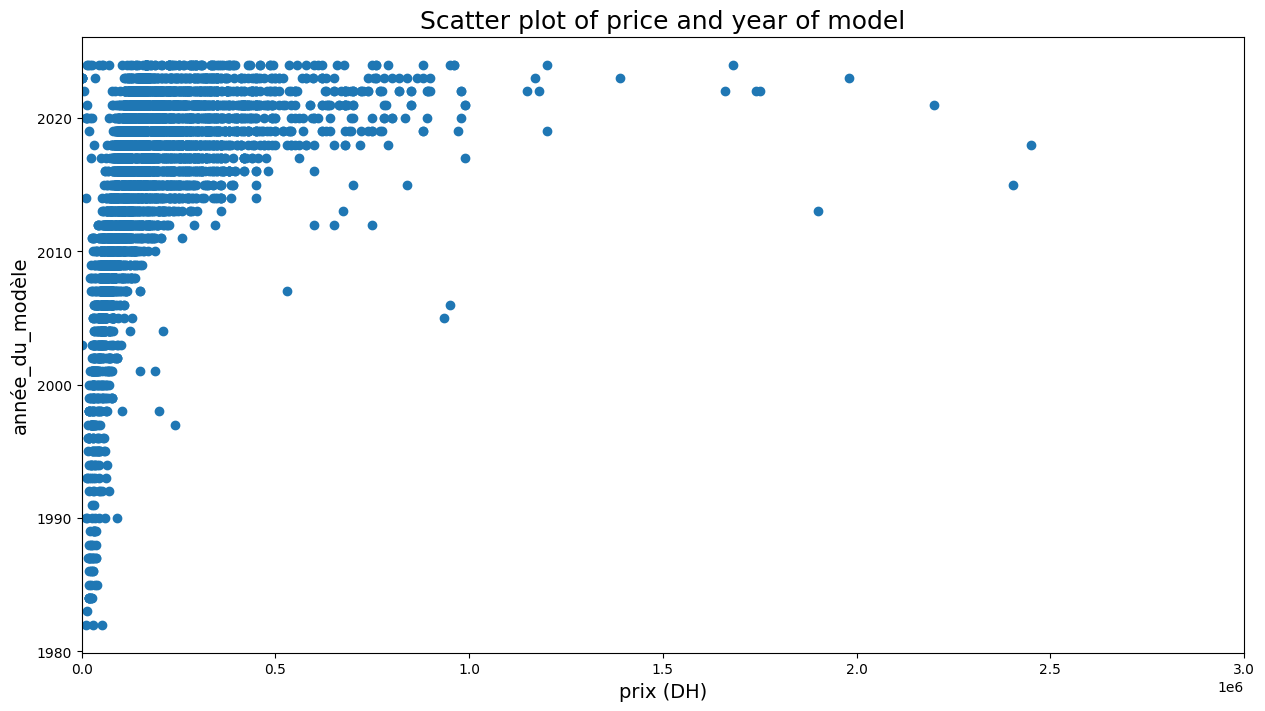

In [473]:
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.prix, df.année_du_modèle)
plt.xlabel("prix (DH)", fontsize=14)
plt.ylabel("année_du_modèle", fontsize=14)
# Définir les limites de l'axe des x de 0 à 200 000
plt.xlim(0, 3000000)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

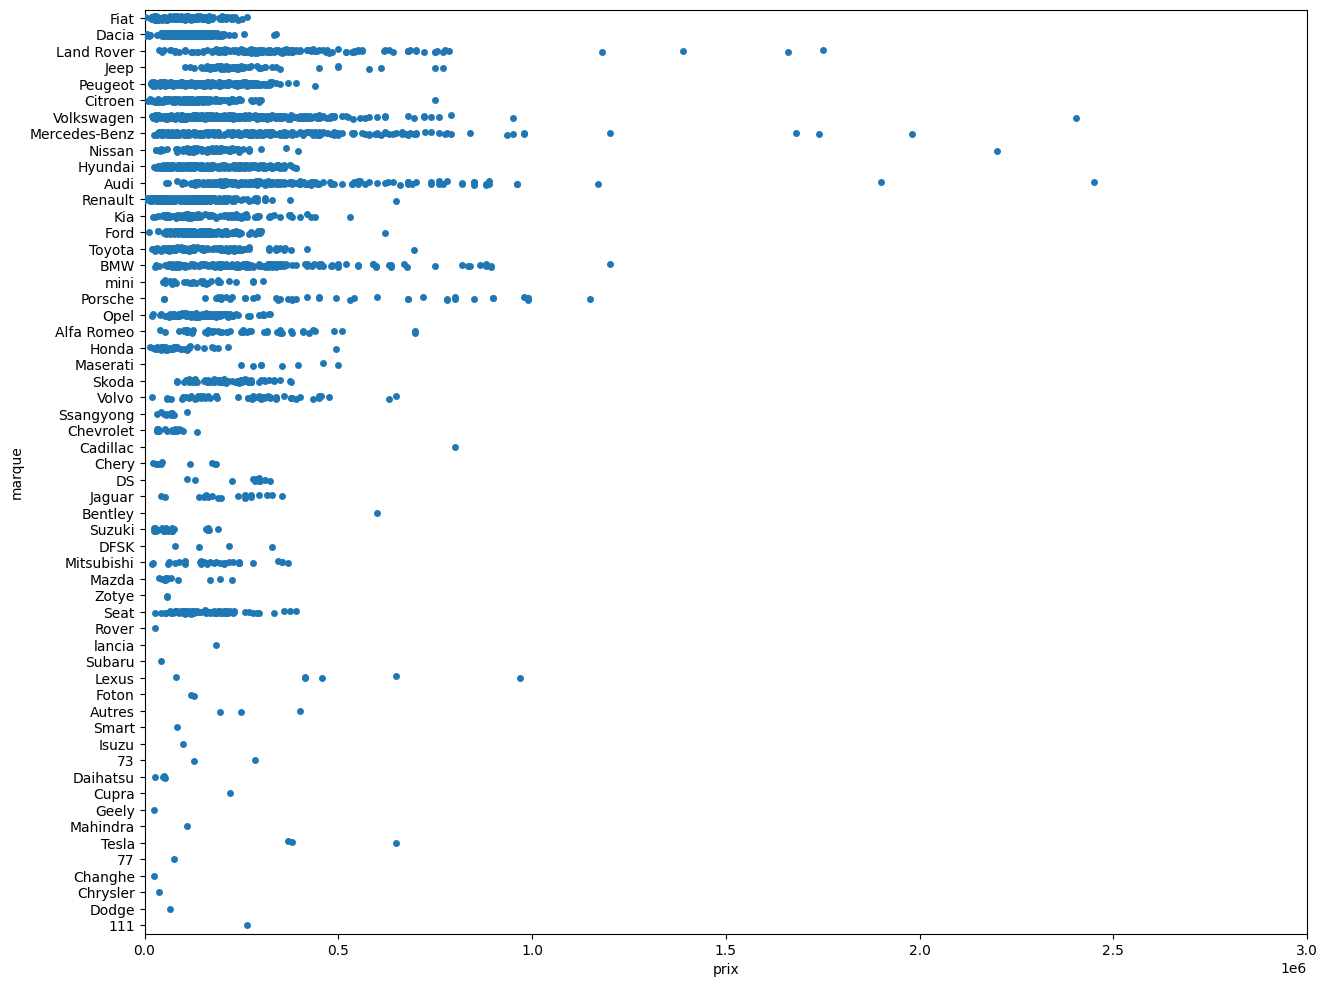

In [474]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xlim(0, 3000000)
sns.stripplot(data = df, x='prix', y='marque', jitter=.1)
plt.show()

The popular marks such as Renault, Peugeot, Citroen, Dacia, Hyundai,Audi KIA had a stable range of price, in other words they are not well diversified on the price axis.
In the opposit side, we can clearly notice that the sophisticated cars are well distributed over the price axis such as the Mercedes-Benz, Land-Rover, Audi, Maserati, Porsche ..., which means that the more the cars from those classes, the more their price augments

### price distribution by fiscal_power

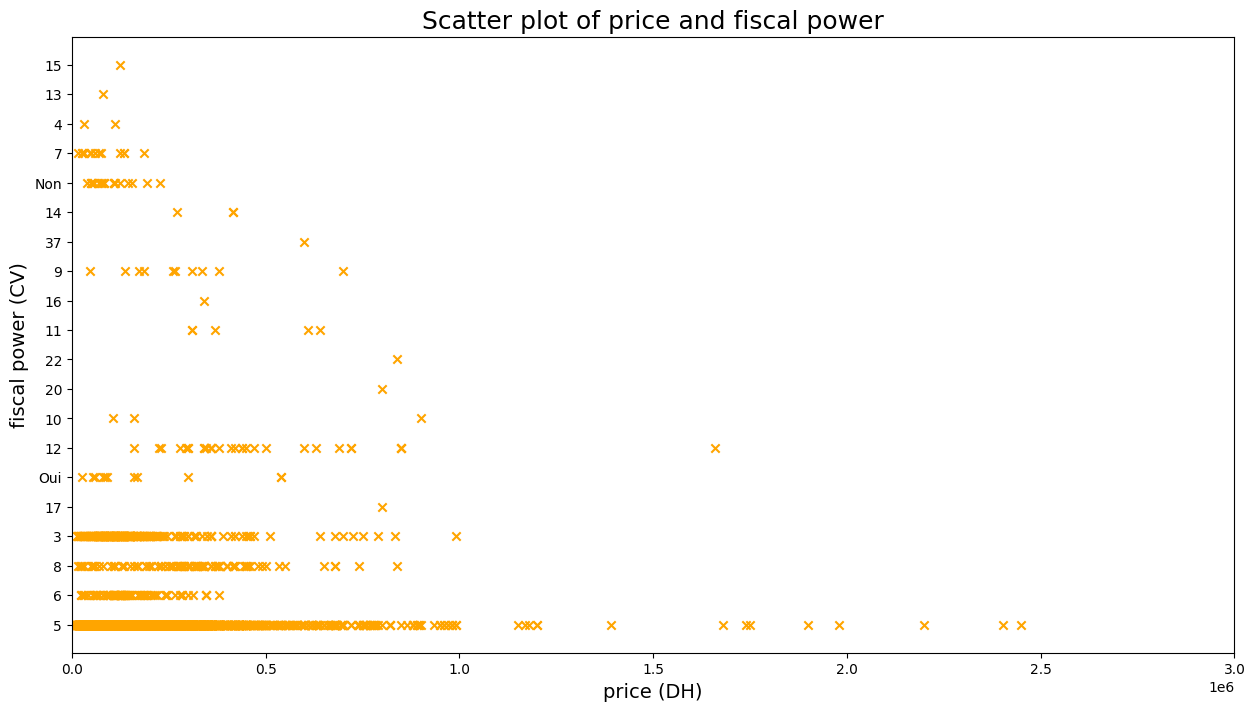

In [475]:
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.prix, df.puissance_fiscale, c='orange', marker='x')
plt.xlim(0, 3000000)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("fiscal power (CV)", fontsize=14)
plt.title("Scatter plot of price and fiscal power",fontsize=18)
plt.show()

In [476]:
print('The length of unique marks feature is',len(df.marque.unique()))

The length of unique marks feature is 56


In [477]:
df.marque.value_counts().nlargest(20)

marque
Volkswagen       554
Renault          470
Dacia            428
Peugeot          369
Mercedes-Benz    345
Hyundai          282
Fiat             276
Ford             246
Audi             234
BMW              218
Citroen          194
Land Rover       175
Kia              155
Toyota           136
Opel             131
Nissan           105
Jeep              94
Skoda             87
Seat              79
Volvo             59
Name: count, dtype: int64

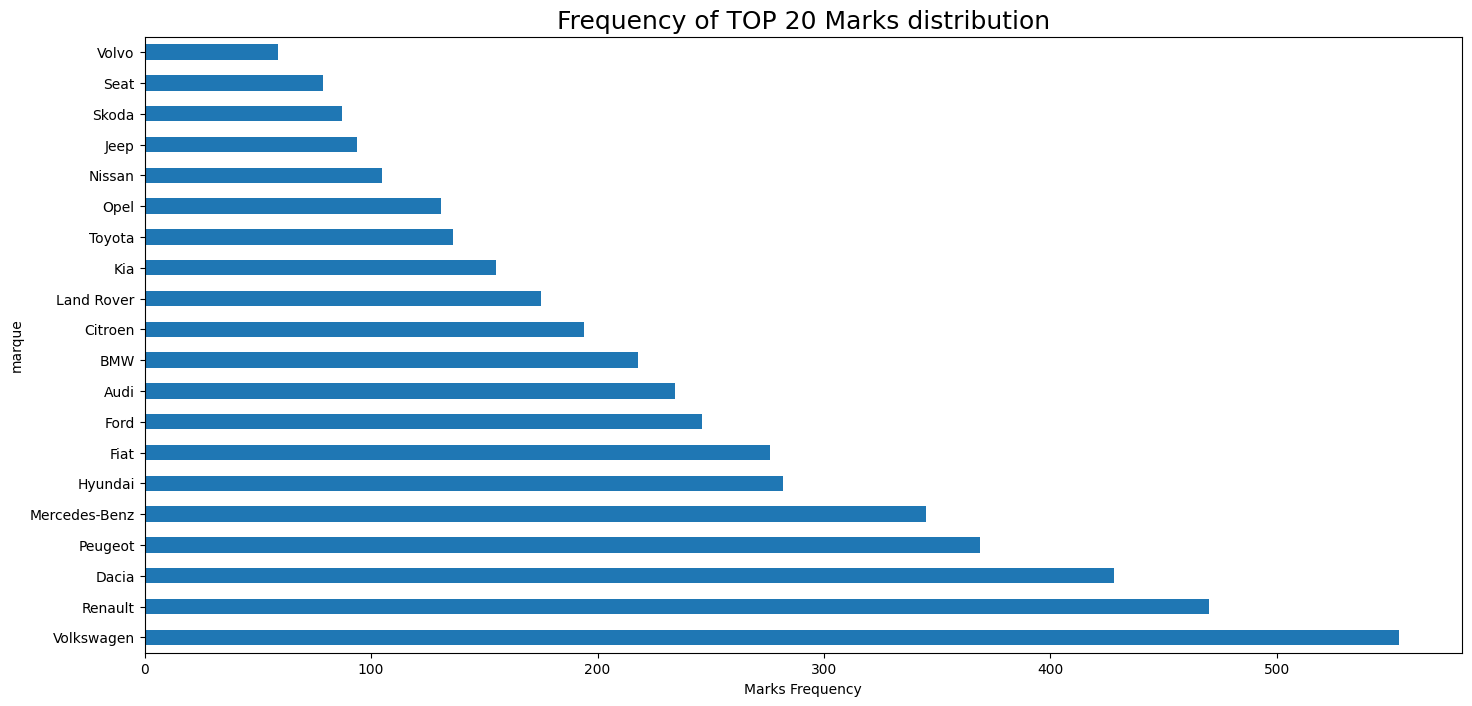

In [478]:
plt.figure(figsize=(17,8))
df.marque.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

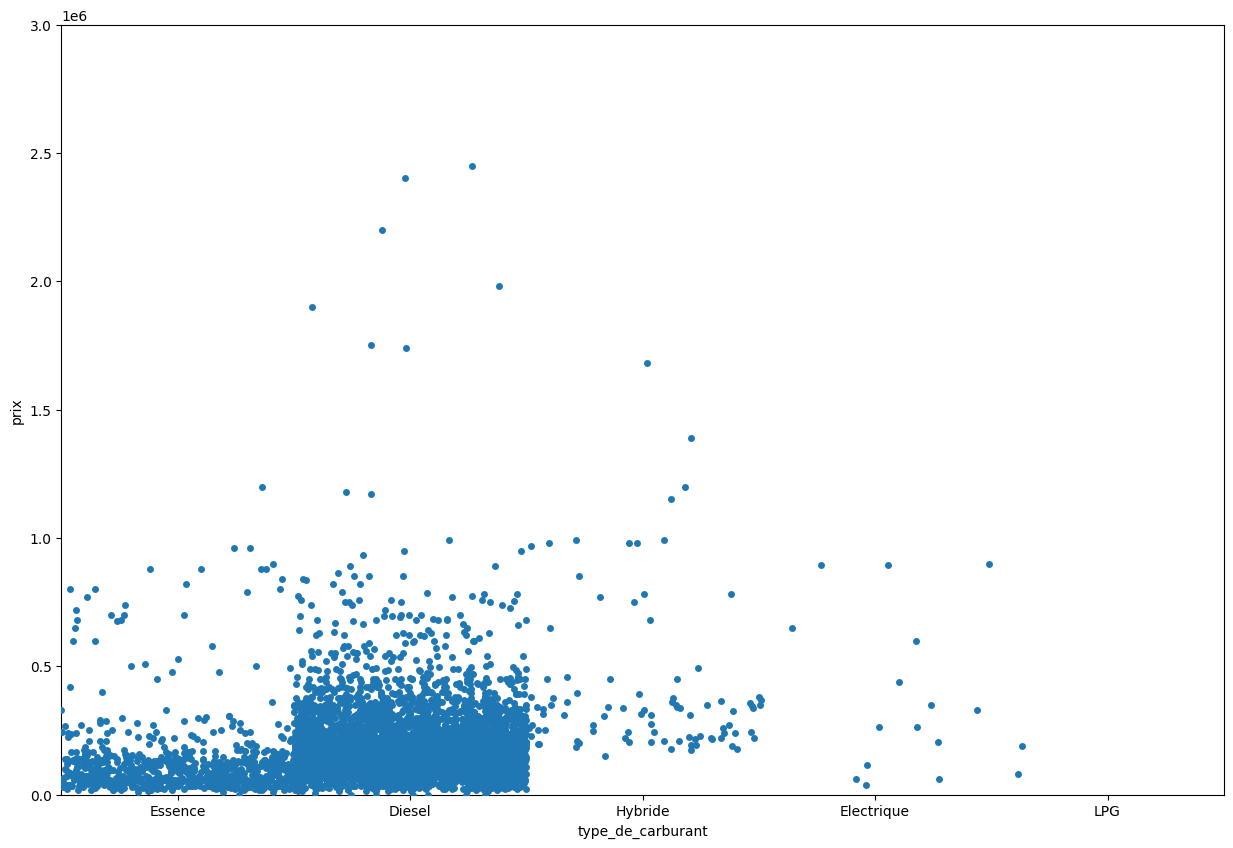

In [494]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='type_de_carburant', y='prix', jitter=.5)
plt.ylim(0, 3000000)
plt.show()

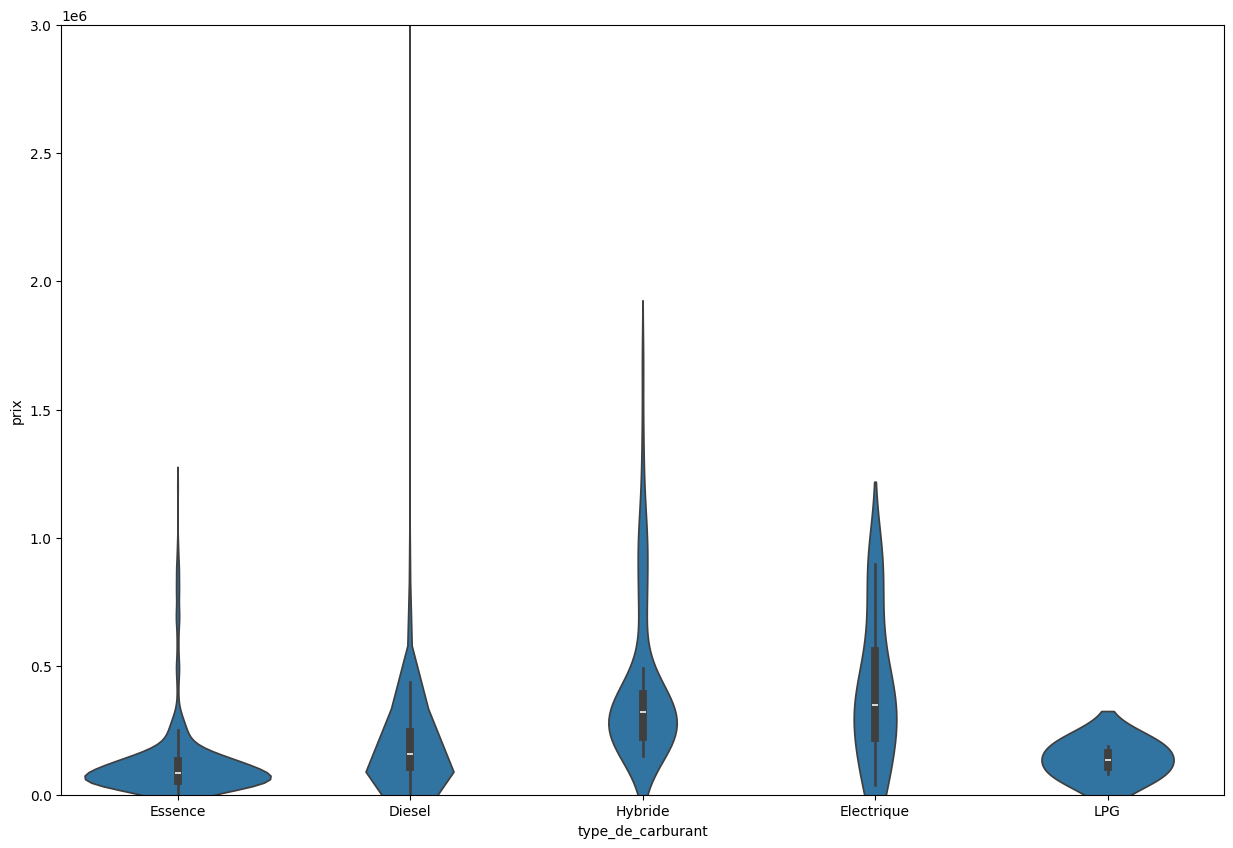

In [495]:
f, ax = plt.subplots(figsize=(15, 10))
plt.ylim(0, 3000000)
sns.violinplot(data = df, x='type_de_carburant', y='prix')
plt.show()

In [498]:
color_dict = {'Diesel': 'blue', 'Essence': 'orange', 'Electrique': 'yellow', 'LPG': 'magenta','Hybride':'red'}

In [482]:
df = df[df['année_du_modèle'].notnull() & df['prix'].notnull()]

In [483]:
print(df[['année_du_modèle', 'prix']].info())
print(df[['année_du_modèle', 'prix']].describe())

# Rechercher les valeurs manquantes ou non numériques
print(df[['année_du_modèle', 'prix']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 0 to 8713
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   année_du_modèle  5003 non-null   float64
 1   prix             5003 non-null   int32  
dtypes: float64(1), int32(1)
memory usage: 97.7 KB
None
       année_du_modèle          prix
count      5003.000000  5.003000e+03
mean       2015.423546  1.968001e+05
std           6.880593  3.836408e+05
min        1982.000000  1.000000e+00
25%        2012.000000  9.700000e+04
50%        2017.000000  1.490000e+05
75%        2020.000000  2.350000e+05
max        2024.000000  2.400000e+07
année_du_modèle    0
prix               0
dtype: int64


In [484]:
df

marque              modèle puissance_fiscale  année_du_modèle  \
0           Fiat                 500                 5           2022.0   
2          Dacia              Dokker                 6           2019.0   
3     Land Rover  Range Rover Evoque                 8           2017.0   
5     Land Rover  Range Rover Evoque                 8           2018.0   
6           Jeep            Wrangler                 5           2022.0   
...          ...                 ...               ...              ...   
8708     Peugeot                 309                 5           1994.0   
8709     Peugeot                 309                 5           1994.0   
8710     Renault                 R18                 8           1983.0   
8712  Volkswagen              GOLF 7                 5           2015.0   
8713     Peugeot                 508                 8           2017.0   

        prix type_de_carburant  kilométrage  
0     125000           Essence      62499.5  
2     140000               NaN      72499.5  
3     255000               NaN     114999.5  
5     325000               NaN     114999.5  
6     500000           Essence      52499.5  
...      ...               ...          ...  
8708   24000            Diesel      67499.5  
8709   24000            Diesel      67499.5  
8710   15000            Diesel     184999.5  
8712  220000            Diesel     194999.5  
8713  160000            Diesel     154999.5  

[5003 rows x 7 columns]

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 0 to 8713
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             5003 non-null   object 
 1   modèle             5003 non-null   object 
 2   puissance_fiscale  5003 non-null   object 
 3   année_du_modèle    5003 non-null   float64
 4   prix               5003 non-null   int32  
 5   type_de_carburant  4926 non-null   object 
 6   kilométrage        5003 non-null   float64
dtypes: float64(2), int32(1), object(4)
memory usage: 293.1+ KB


In [496]:
print(df['type_de_carburant'].isna().sum())  # Nombre de NaN dans la colonne
print(df['type_de_carburant'].unique()) 


0
['Essence' 'Diesel' 'Hybride' 'Electrique' 'LPG']


In [492]:
print(df['type_de_carburant'].isna().sum())

77


In [491]:
df['type_de_carburant'].dropna()

0       Essence
6       Essence
7        Diesel
9        Diesel
13       Diesel
         ...   
8708     Diesel
8709     Diesel
8710     Diesel
8712     Diesel
8713     Diesel
Name: type_de_carburant, Length: 4926, dtype: object

In [ ]:
f = df.dropna(subset=['type_de_carburant'])


In [488]:
print(df['type_de_carburant'].unique()) 

['Essence' nan 'Diesel' 'Hybride' 'Electrique' 'LPG']


C:\Users\HA\AppData\Local\Temp\ipykernel_29604\3676640381.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])
C:\Users\HA\AppData\Local\Temp\ipykernel_29604\3676640381.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])


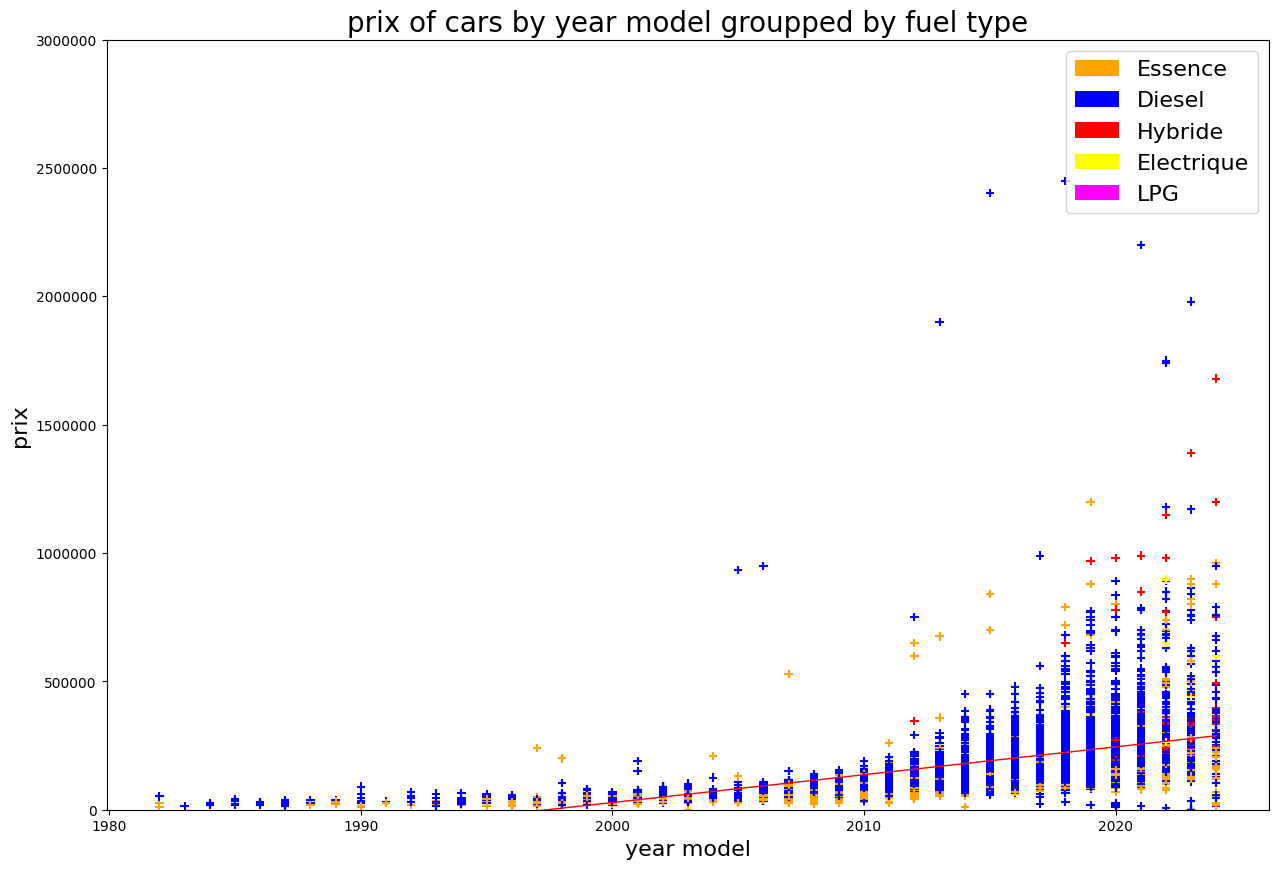

In [500]:
import matplotlib.patches as mpatches
# set the figure size and plot the prix & mileage points with the fit line in red
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(np.unique(df.année_du_modèle), np.poly1d(np.polyfit(df.année_du_modèle, df.prix, 1))(np.unique(df.année_du_modèle)), c = 'red', linewidth = 1)
plt.scatter(df.année_du_modèle, df.prix, c = [color_dict[i] for i in df.type_de_carburant], marker='+')
# get the list of unique fuel type
type_de_carburant = df.type_de_carburant.unique()
recs = []
for i in type_de_carburant:
    recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
    plt.legend(recs,type_de_carburant,loc=1, fontsize = 16)

plt.title('prix of cars by year model groupped by fuel type', 
          fontsize = 20)
plt.ylabel('prix', fontsize = 16)
plt.xlabel('year model', fontsize = 16)

xvals = ax.get_xticks()
ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])
plt.ylim(0, 3000000)
yvals = ax.get_yticks()
ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])

plt.show()

                 année_du_modèle      prix  kilométrage
année_du_modèle         1.000000  0.194457    -0.486610
prix                    0.194457  1.000000    -0.122505
kilométrage            -0.486610 -0.122505     1.000000


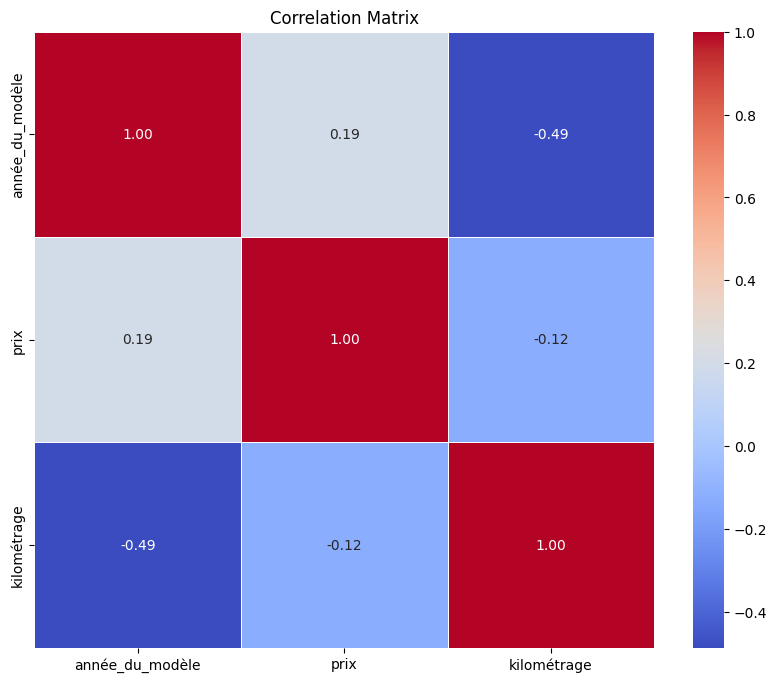

In [503]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Display the correlation matrix
print(corr)

# Optional: Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [505]:
df

marque       modèle puissance_fiscale  année_du_modèle    prix  \
0           Fiat          500                 5           2022.0  125000   
6           Jeep     Wrangler                 5           2022.0  500000   
7        Peugeot         2008                 5           2021.0  245000   
9        Citroen  C5 Aircross                 5           2019.0  242000   
13    Volkswagen       Passat                 5           2021.0  239000   
...          ...          ...               ...              ...     ...   
8708     Peugeot          309                 5           1994.0   24000   
8709     Peugeot          309                 5           1994.0   24000   
8710     Renault          R18                 8           1983.0   15000   
8712  Volkswagen       GOLF 7                 5           2015.0  220000   
8713     Peugeot          508                 8           2017.0  160000   

     type_de_carburant  kilométrage  
0              Essence      62499.5  
6              Essence      52499.5  
7               Diesel      77499.5  
9               Diesel     194999.5  
13              Diesel      92499.5  
...                ...          ...  
8708            Diesel      67499.5  
8709            Diesel      67499.5  
8710            Diesel     184999.5  
8712            Diesel     194999.5  
8713            Diesel     154999.5  

[4926 rows x 7 columns]

In [506]:
df.to_csv("cleaned_data.csv")

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [507]:
data=pd.read_csv("cleaned_data.csv")

In [525]:
X = data[['année_du_modèle', 'kilométrage', 'puissance_fiscale', 'type_de_carburant', 'marque']]
Y=data.prix
X = pd.get_dummies(data=X,dtype=int)

In [526]:
X.head()

année_du_modèle  kilométrage  puissance_fiscale_10  puissance_fiscale_12  \
0           2022.0      62499.5                     0                     0   
1           2022.0      52499.5                     0                     0   
2           2021.0      77499.5                     0                     0   
3           2019.0     194999.5                     0                     0   
4           2021.0      92499.5                     0                     0   

   puissance_fiscale_13  puissance_fiscale_15  puissance_fiscale_16  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   puissance_fiscale_17  puissance_fiscale_20  puissance_fiscale_22  ...  \
0                     0                     0                     0  ...   
1                     0                     0                     0  ...   
2                     0                     0                     0  ...   
3                     0                     0                     0  ...   
4                     0                     0                     0  ...   

   marque_Ssangyong  marque_Subaru  marque_Suzuki  marque_Tesla  \
0                 0              0              0             0   
1                 0              0              0             0   
2                 0              0              0             0   
3                 0              0              0             0   
4                 0              0              0             0   

   marque_Toyota  marque_Volkswagen  marque_Volvo  marque_Zotye  \
0              0                  0             0             0   
1              0                  0             0             0   
2              0                  0             0             0   
3              0                  0             0             0   
4              0                  1             0             0   

   marque_lancia  marque_mini  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  

[5 rows x 81 columns]

In [527]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

C:\Users\HA\AppData\Local\Temp\ipykernel_29604\4201988030.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


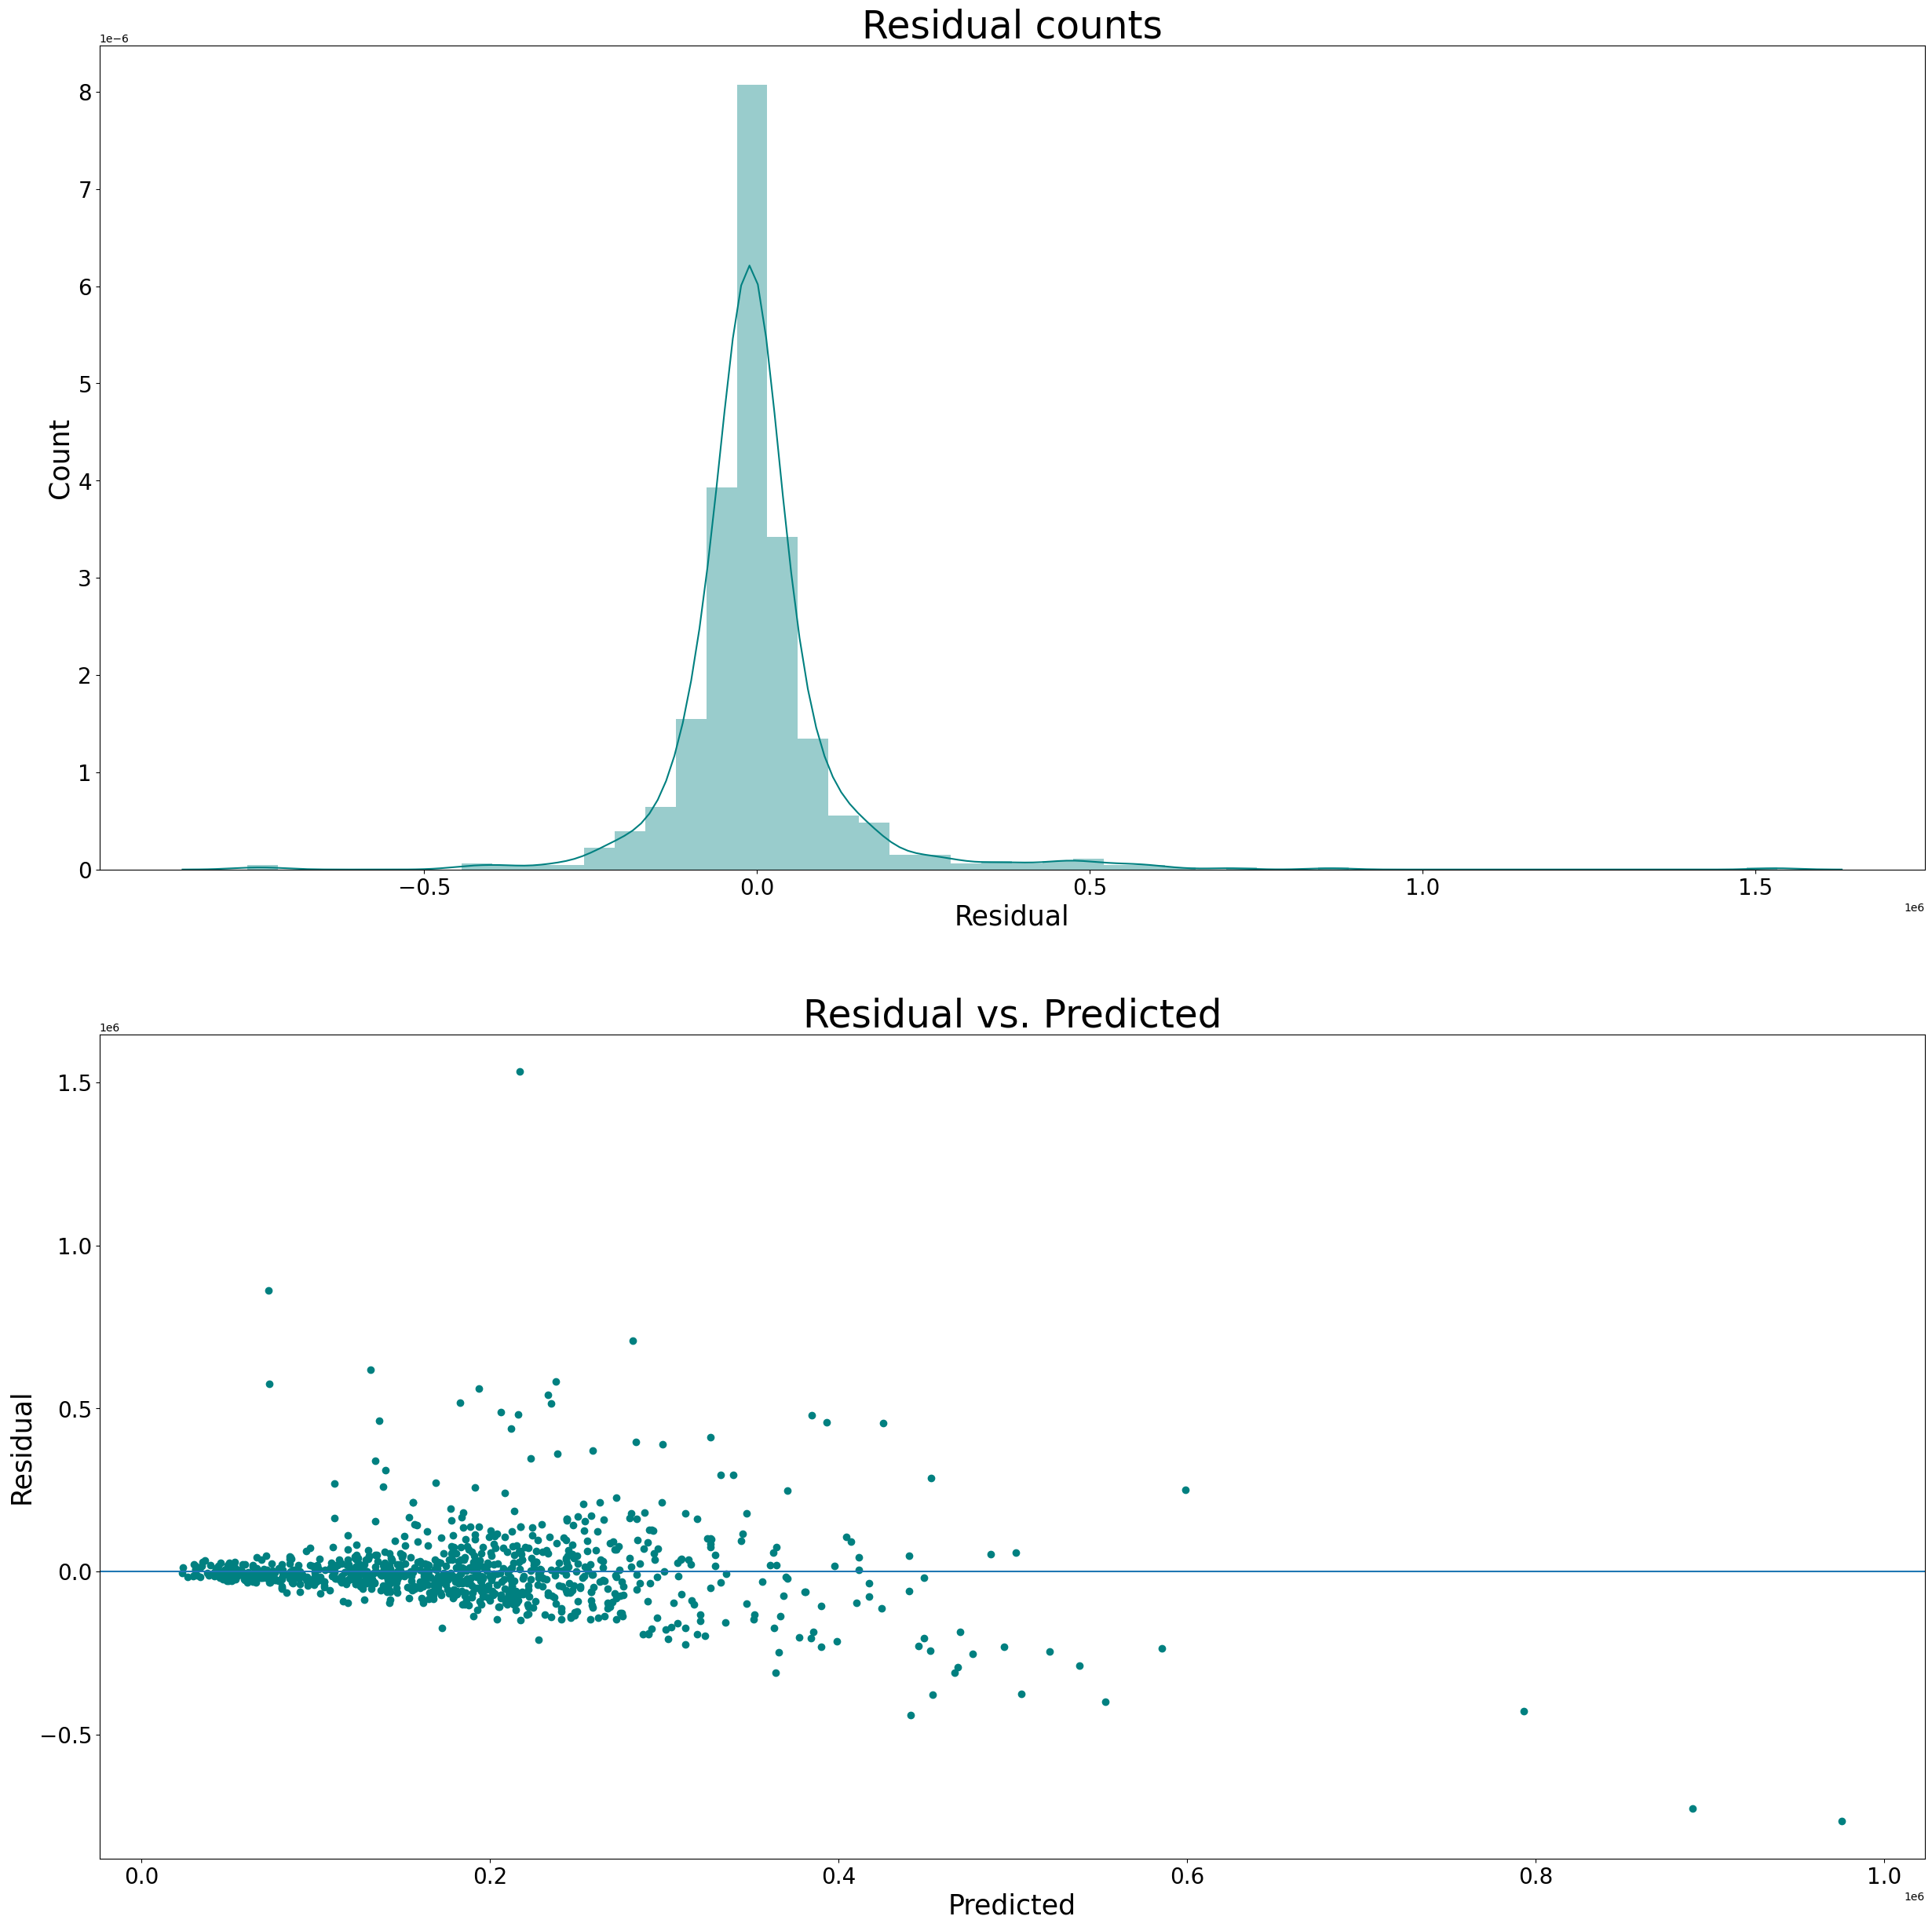

RMSE:
128648.75915498566


In [535]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [536]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.26


In [537]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

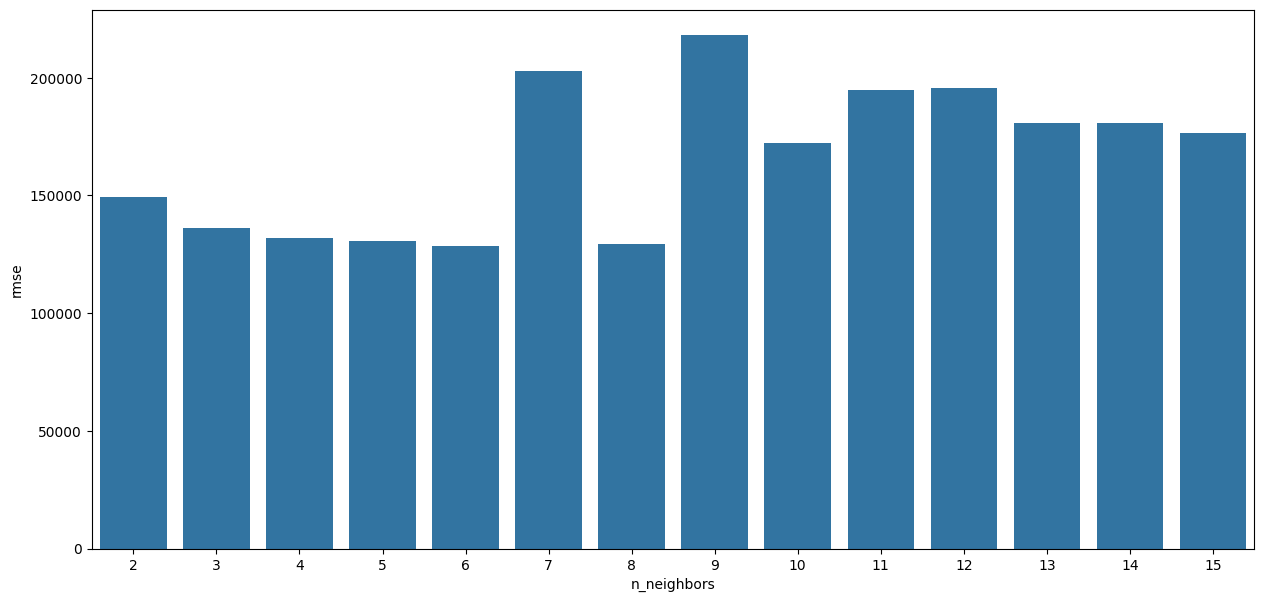

In [538]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_29604\828084709.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='orange')


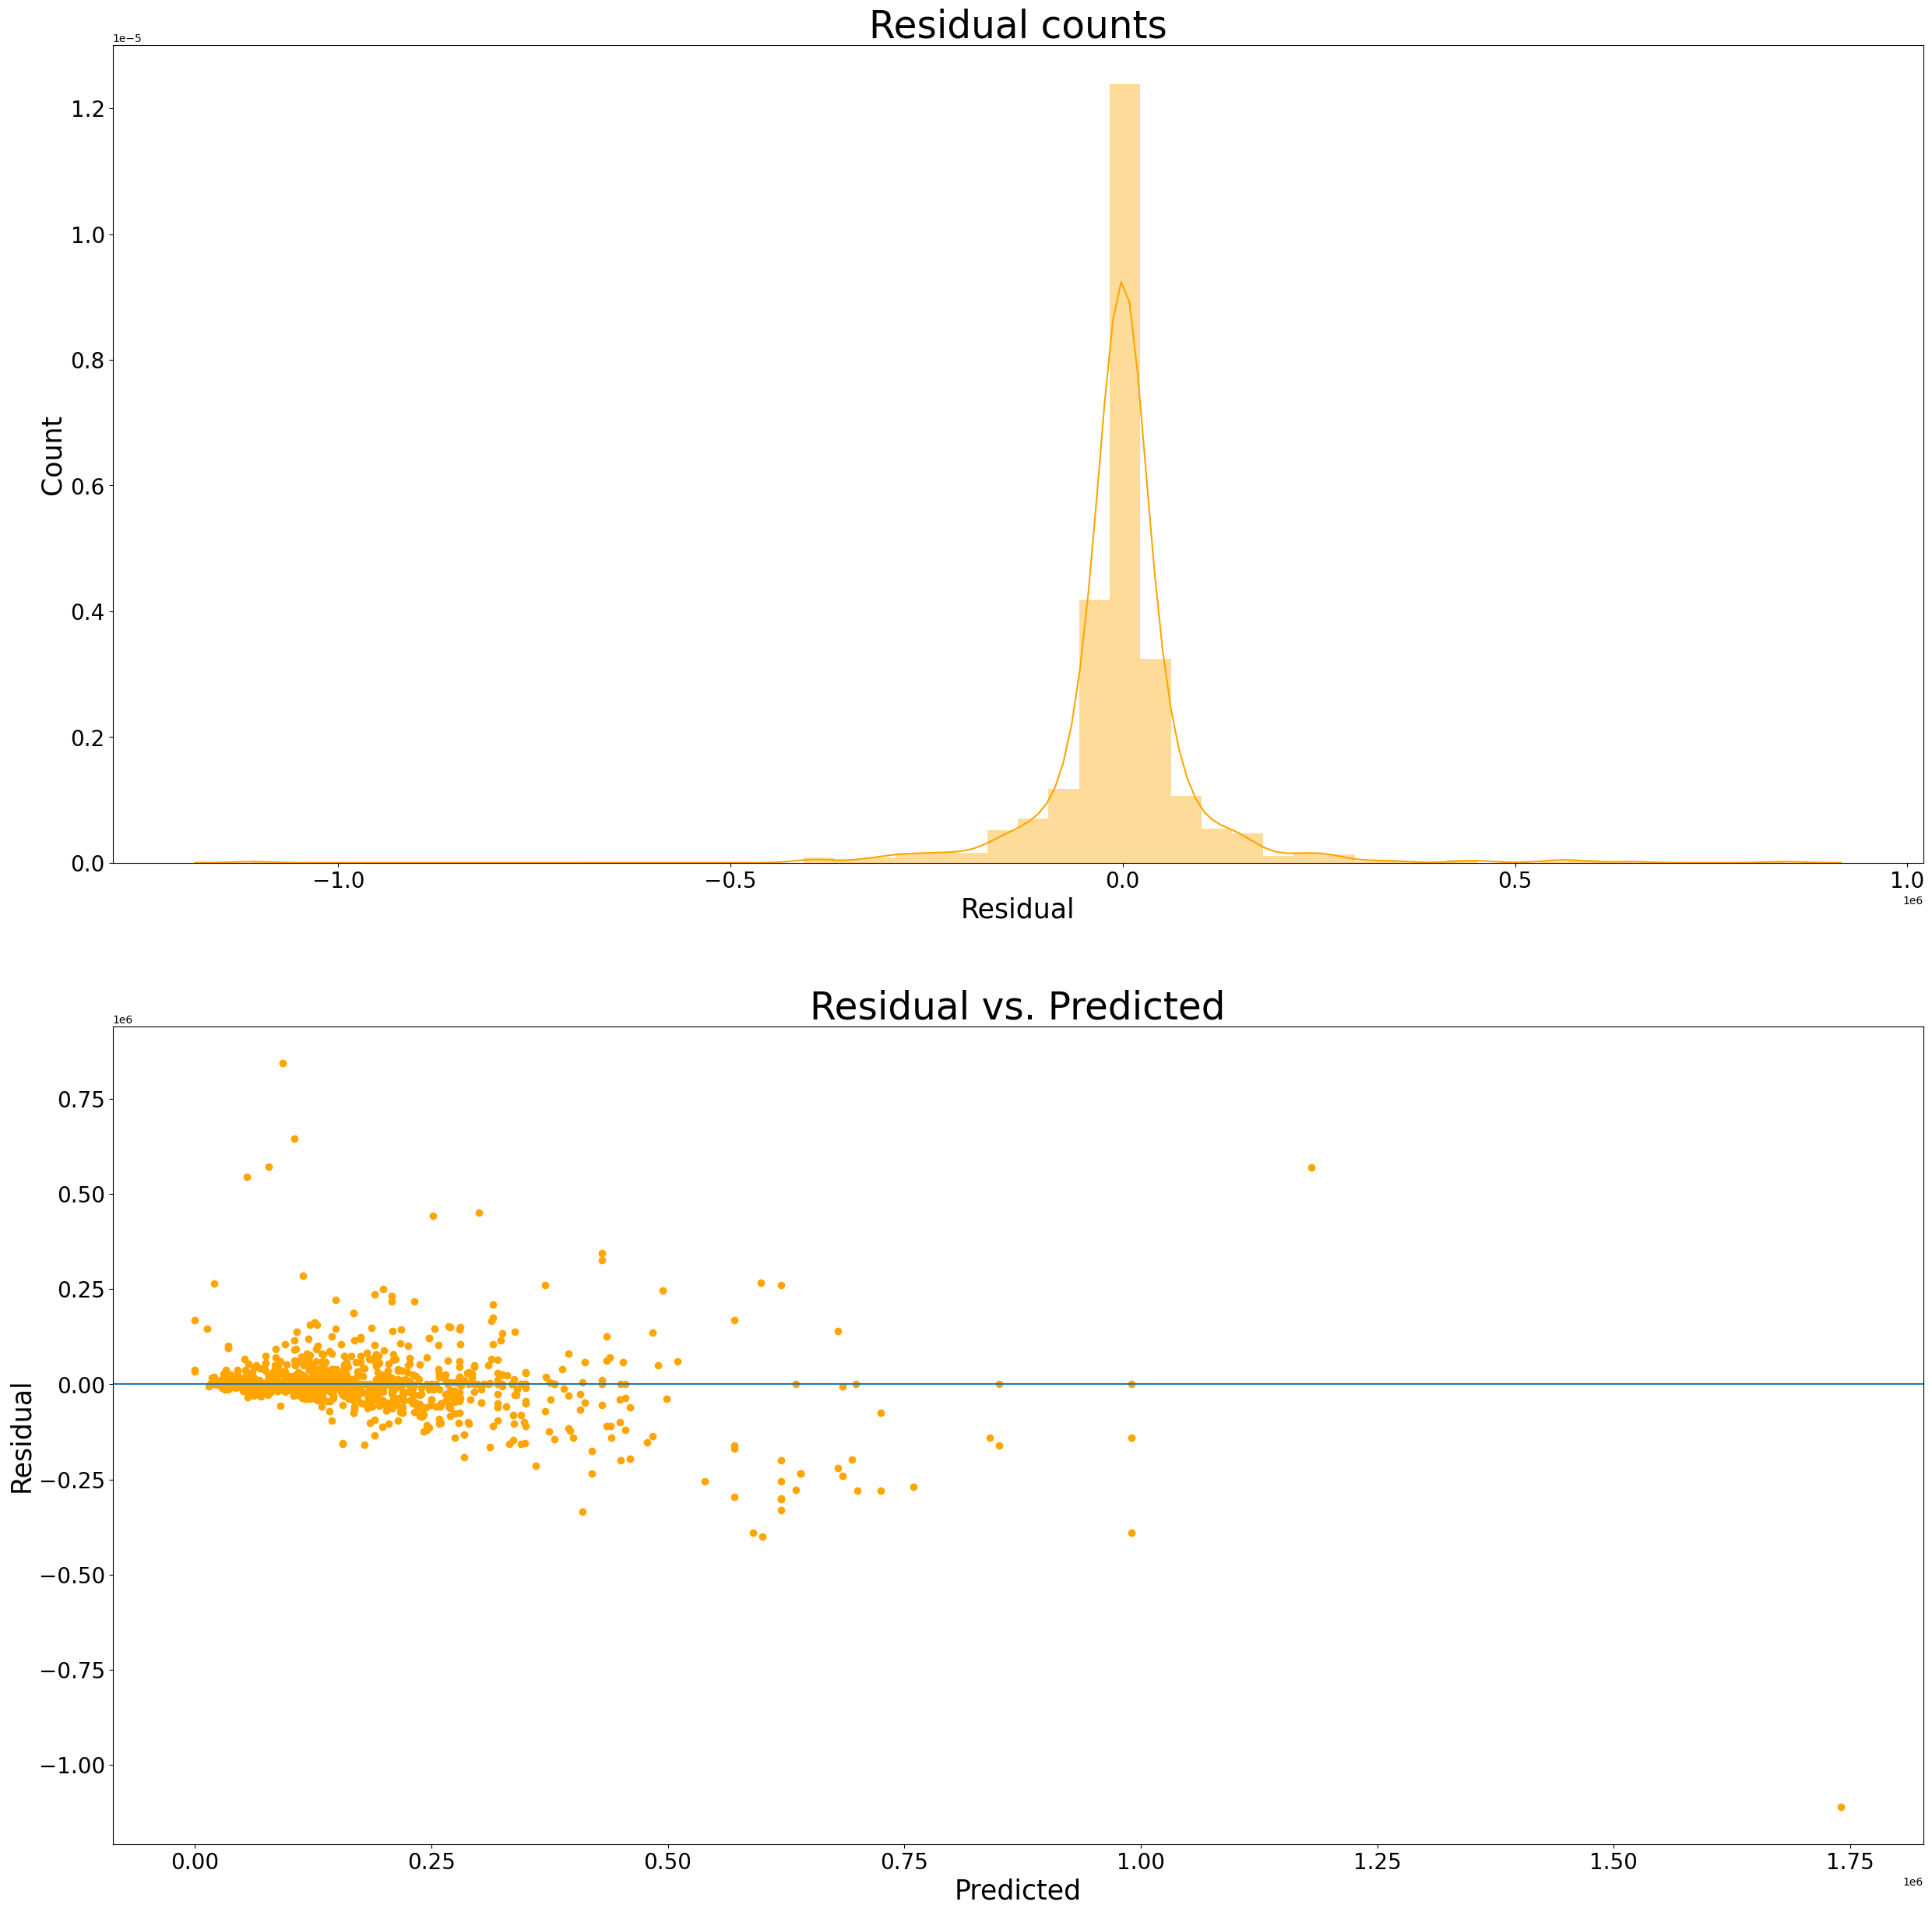

RMSE:
96157.04928496432


In [540]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features=None)
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [541]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.58


C:\Users\HA\AppData\Local\Temp\ipykernel_29604\416296143.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


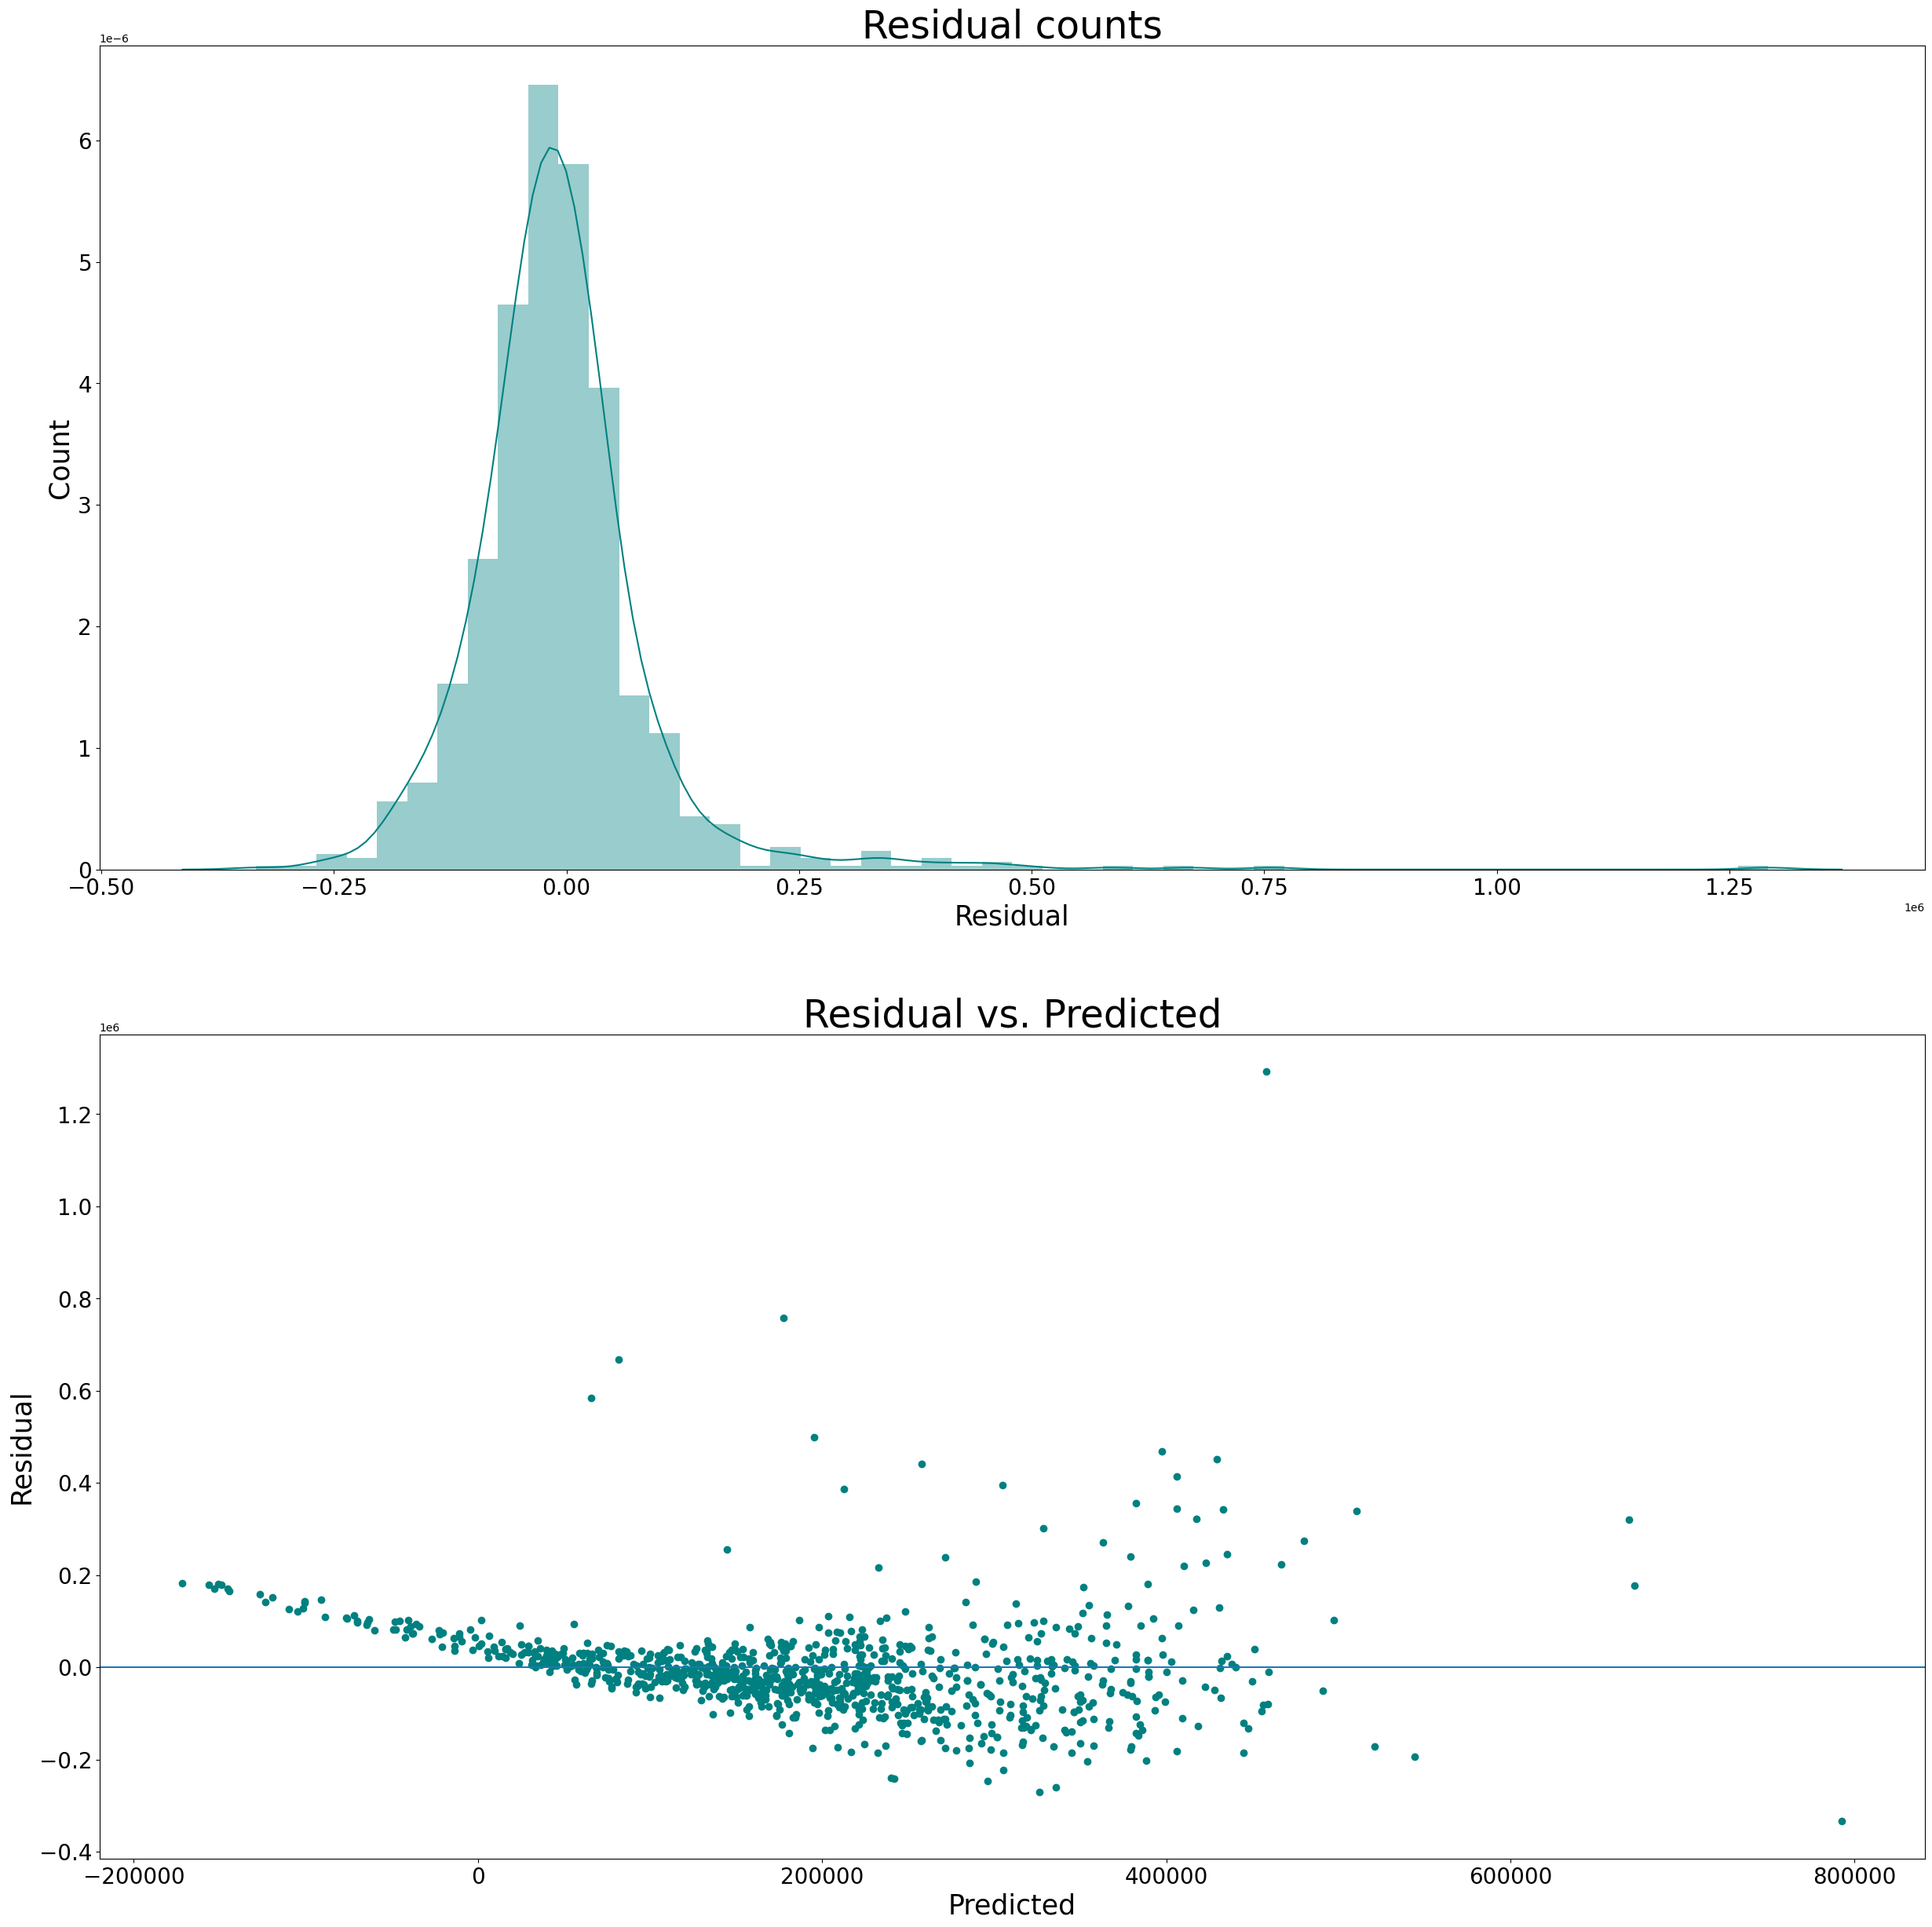

RMSE:
105026.50665020224


In [542]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [543]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.50


In [552]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

r_sq = []
deep = []
mean_scores = []

# Define the KFold cross-validator
kf = KFold(n_splits=12, shuffle=True, random_state=42)

# Loop over different tree depths
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss='squared_error', max_depth=n)
    gbr.fit(X, Y)
    
    # Append tree depth and R^2 score
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    
    # Calculate mean cross-validation score
    scores = []
    for train_idx, test_idx in kf.split(X):
        # Use .iloc for DataFrame indexing
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        # Fit the model on the train set
        gbr.fit(X_train, Y_train)
        
        # Predict on the test set
        Y_pred = gbr.predict(X_test)
        
        # Calculate mean squared error
        mse = mean_squared_error(Y_test, Y_pred)
        scores.append(mse)
    
    # Append the average of the scores
    mean_scores.append(np.mean(scores))

# Print results
print("Tree Depths:", deep)
print("R^2 Scores:", r_sq)
print("Mean Cross-Validation Scores (MSE):", mean_scores)

KeyboardInterrupt: 

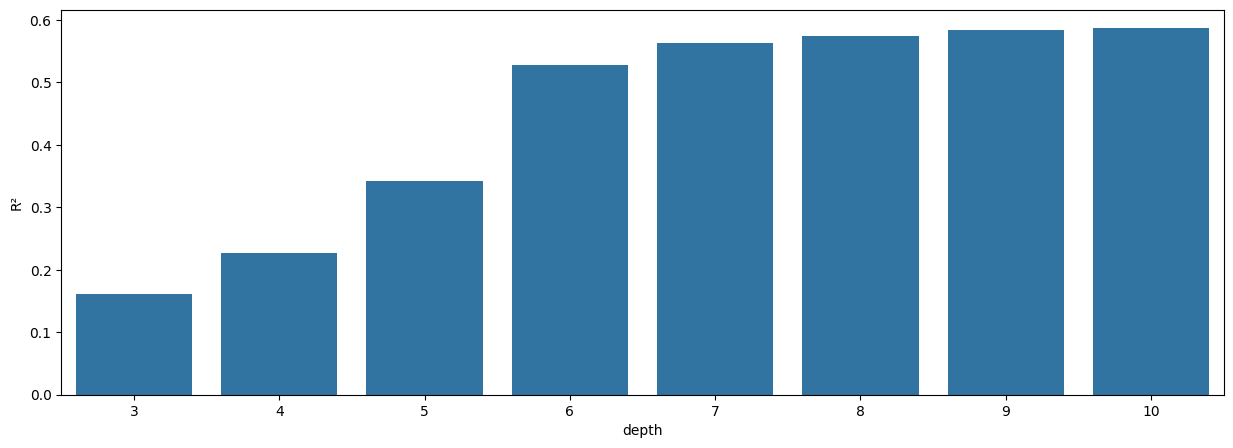

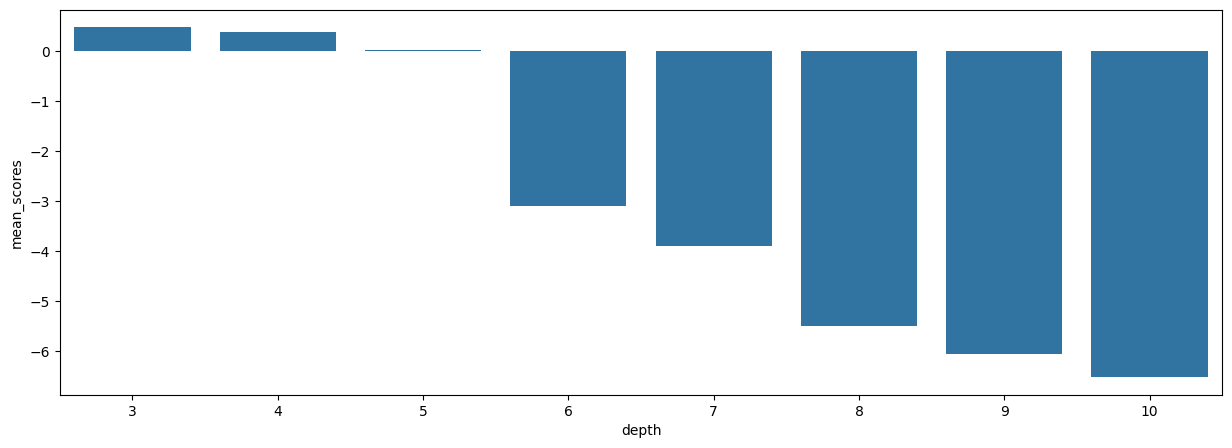

In [546]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_29604\2053910459.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


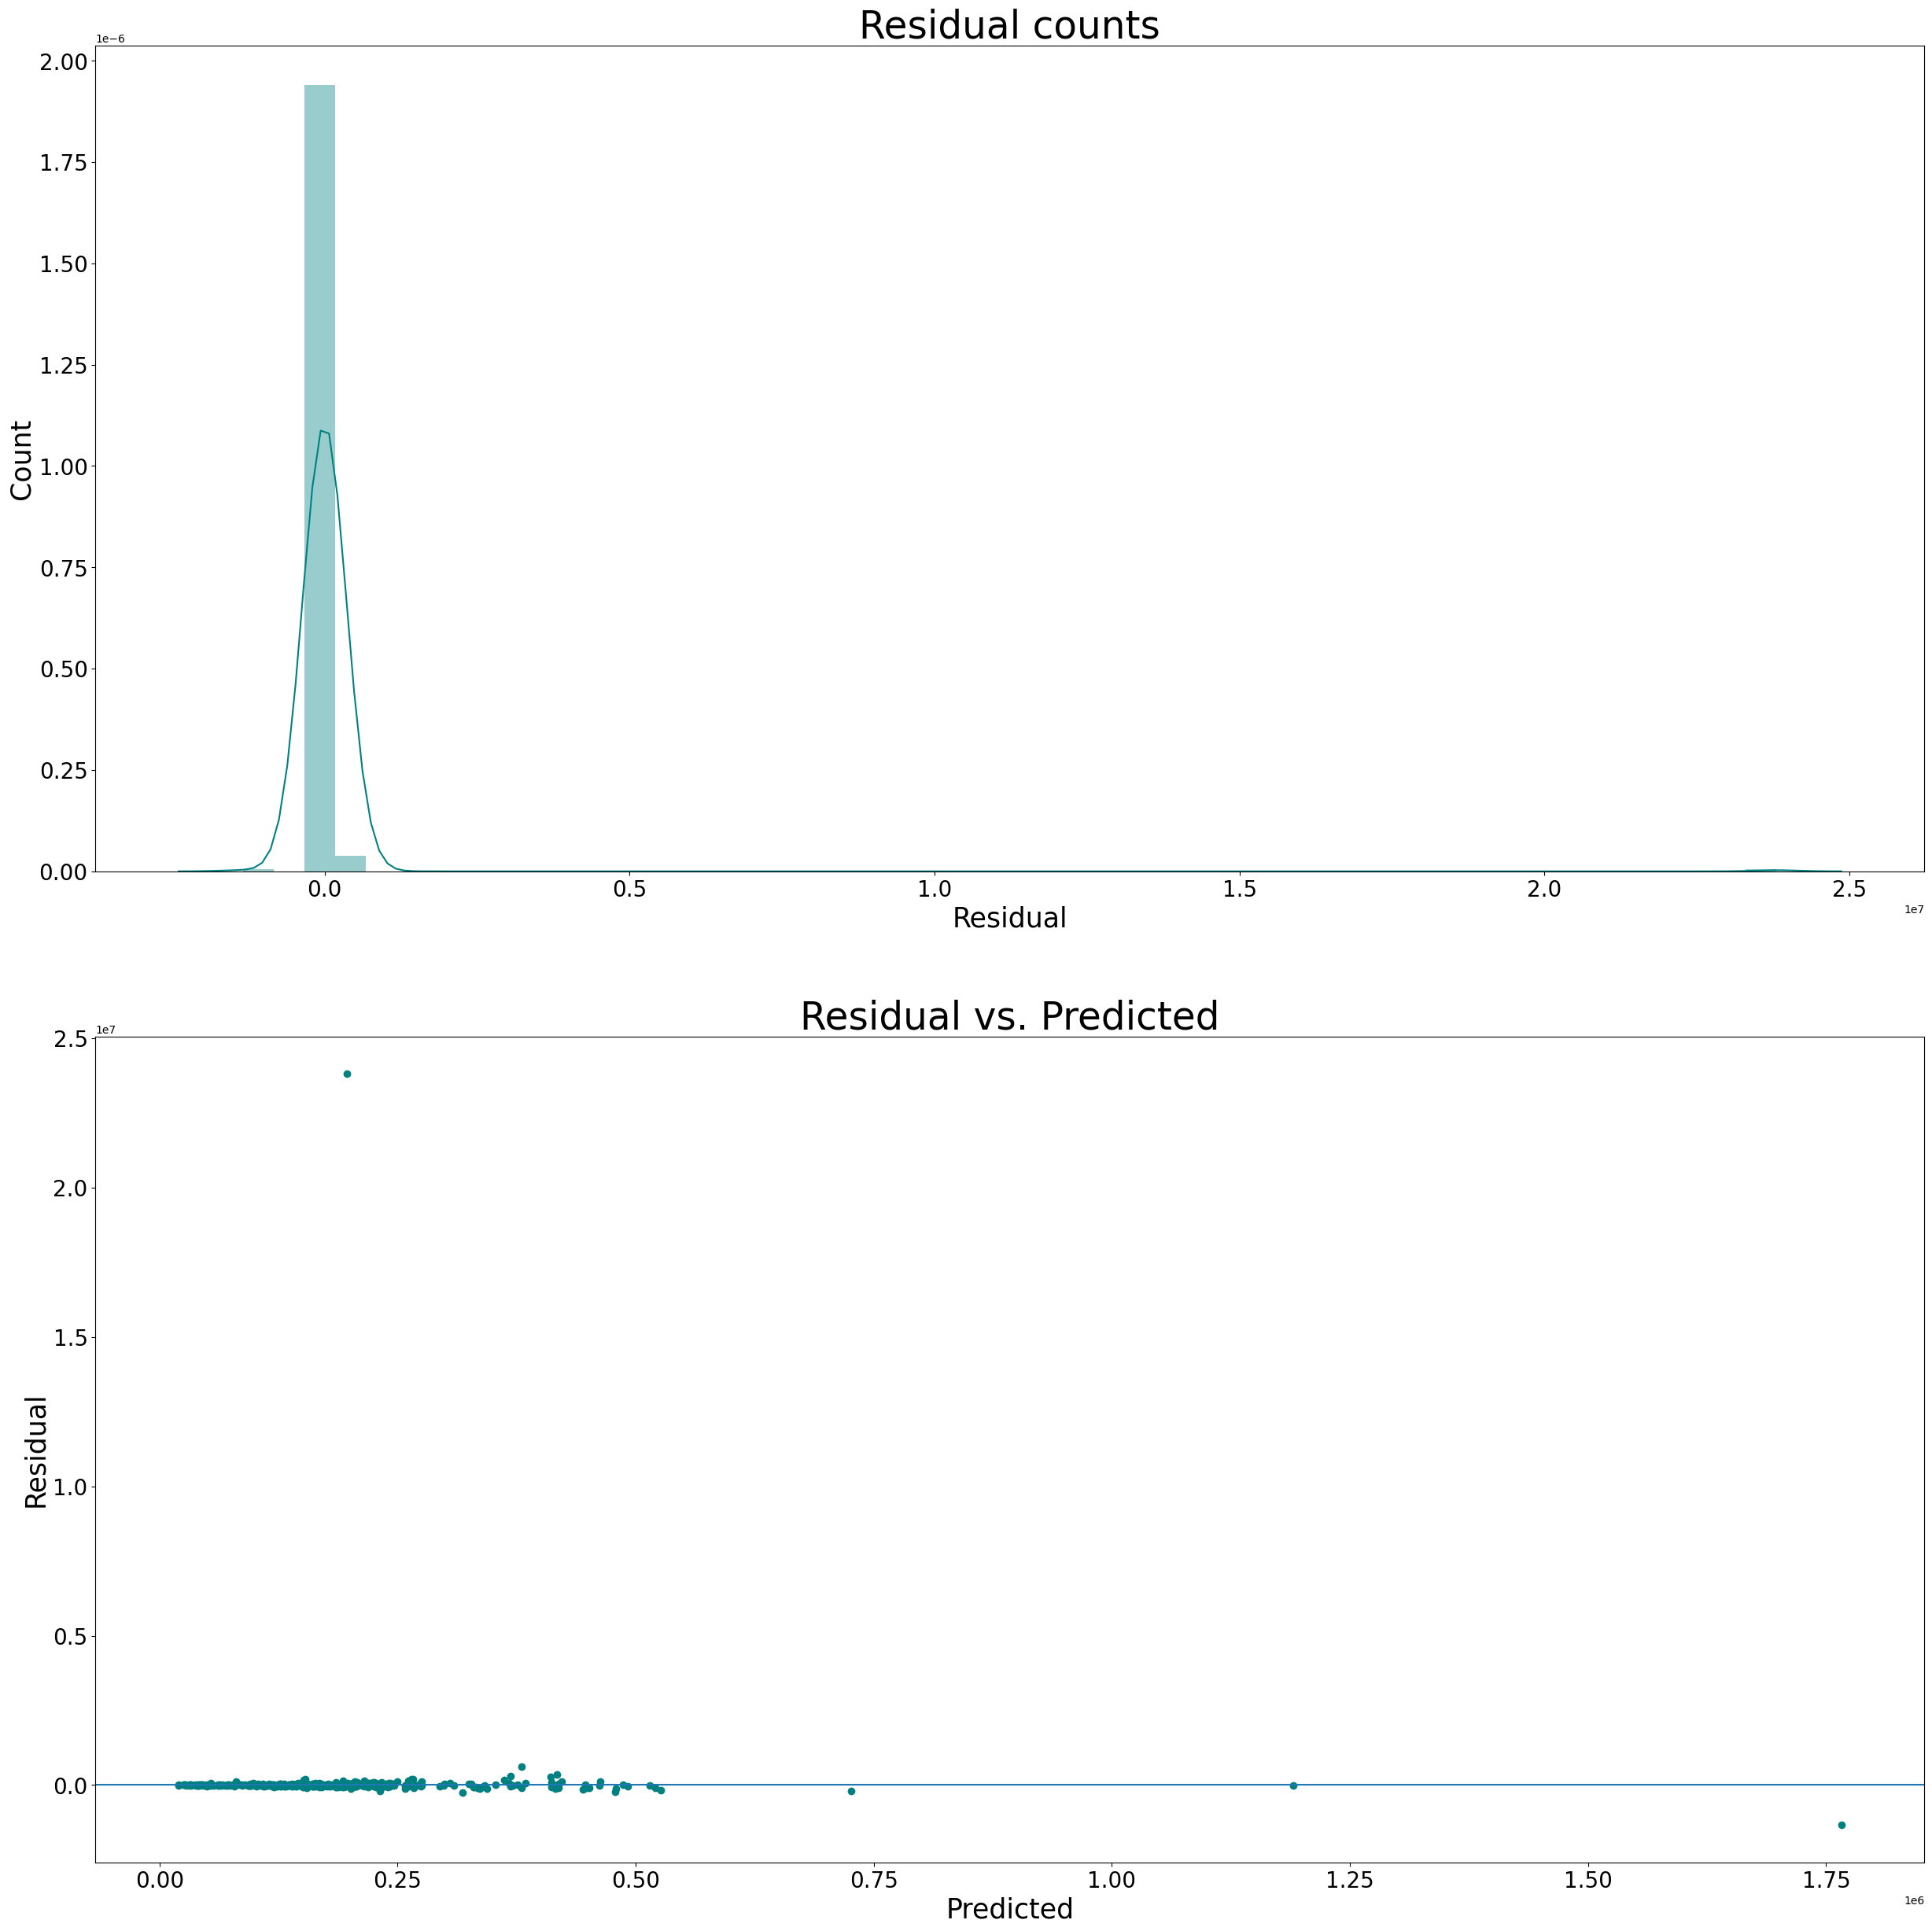


Cross Validation Scores:
[ 4.59040175e-01  4.32885381e-01  6.73909114e-01 -3.92131536e+01
  7.35305463e-03  3.82567049e-01  1.94256831e-01  6.78764824e-01
  6.67009098e-01  5.85832880e-01 -2.53784640e+00  6.35785037e-01]

Mean Score:
-3.0861330471706316

RMSE:
1179304.222330425


In [556]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='squared_error', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [557]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.01



Evaluating GradientBoostingRegressor...


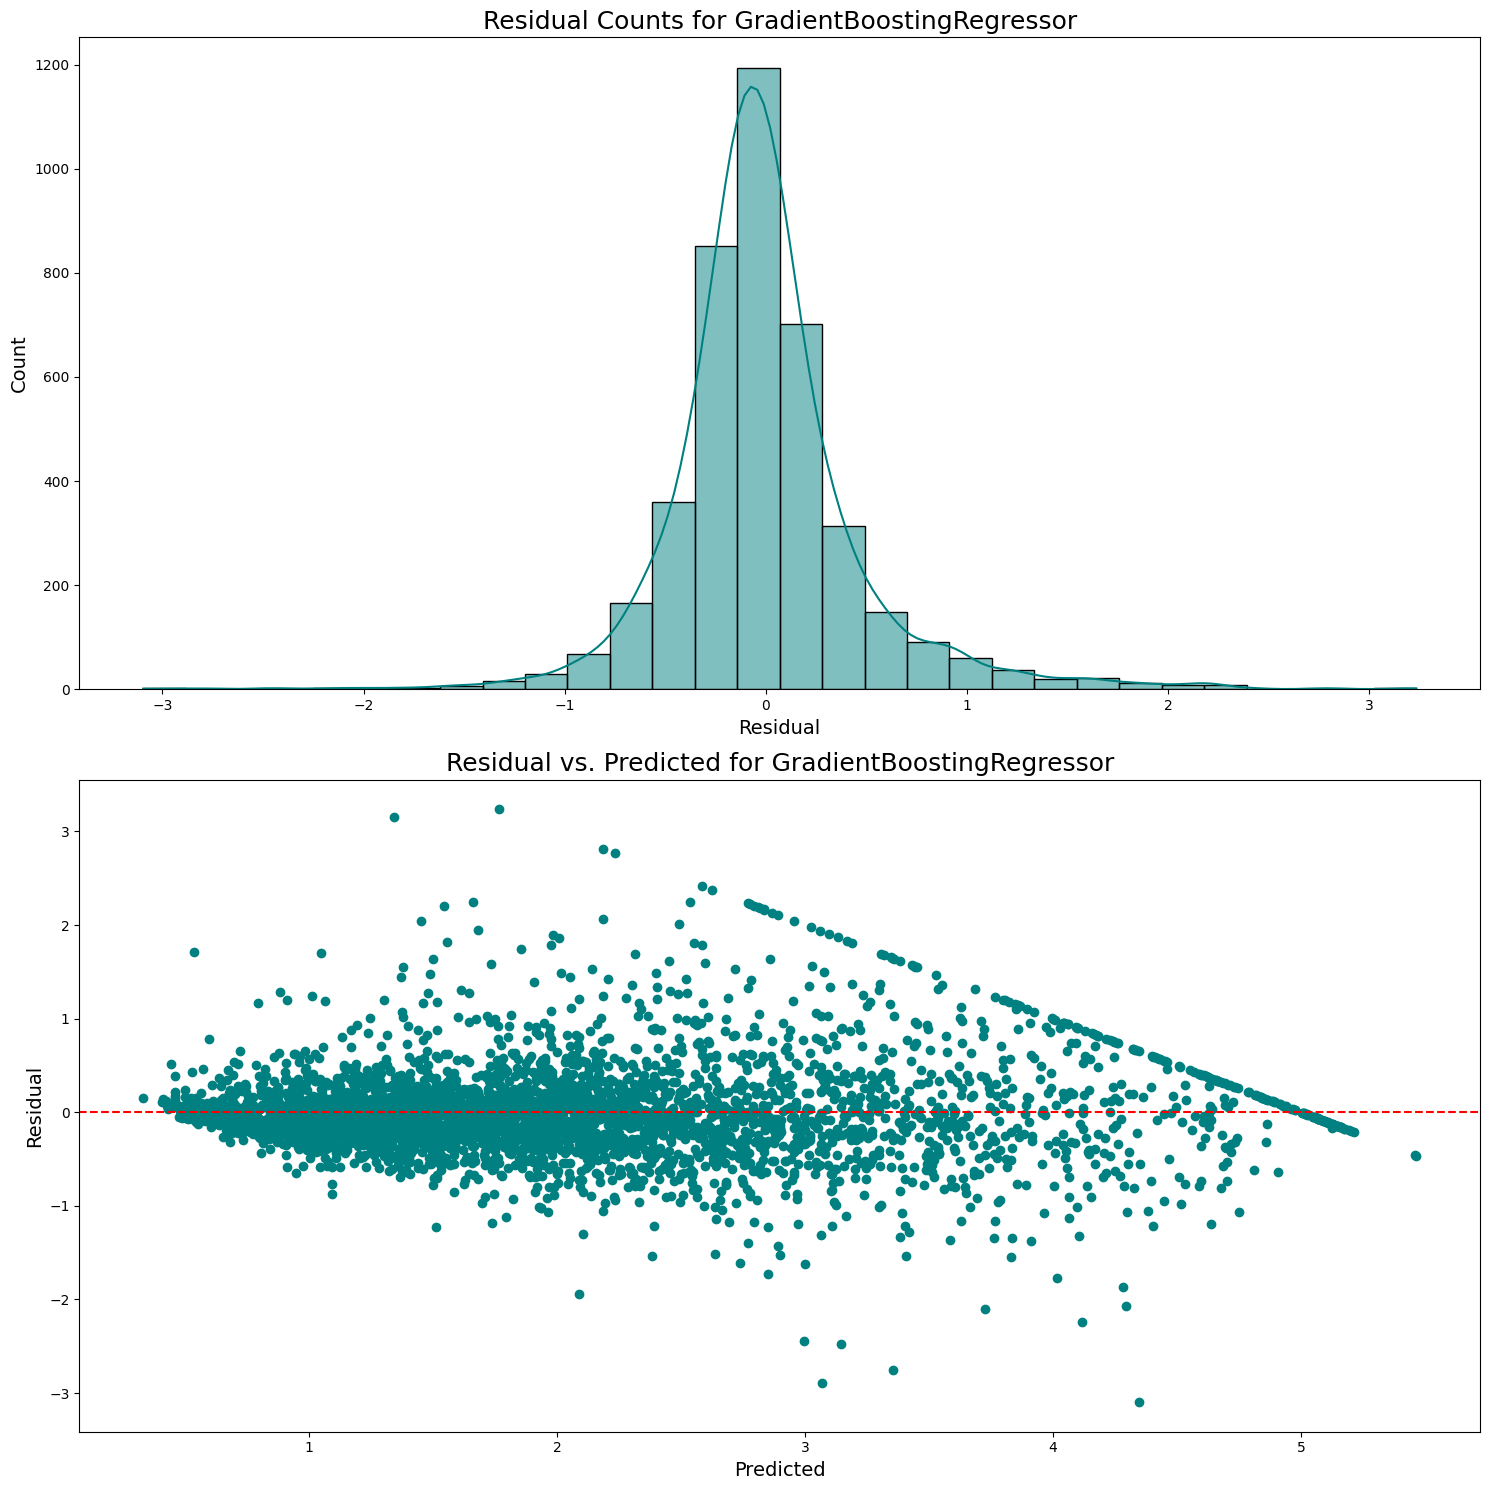


Cross Validation Scores:
[ 0.46079977 -0.07740357  0.71015801  0.75937524  0.70565115  0.78740582
  0.69904318  0.58510865  0.61863274  0.64034881  0.73766423  0.68291225]

Mean Cross Validation Score:
0.6091413556537421

Root Mean Squared Error (RMSE):
0.4780637722695029

R² Score:
0.8255926400448299

Evaluating RandomForestRegressor...


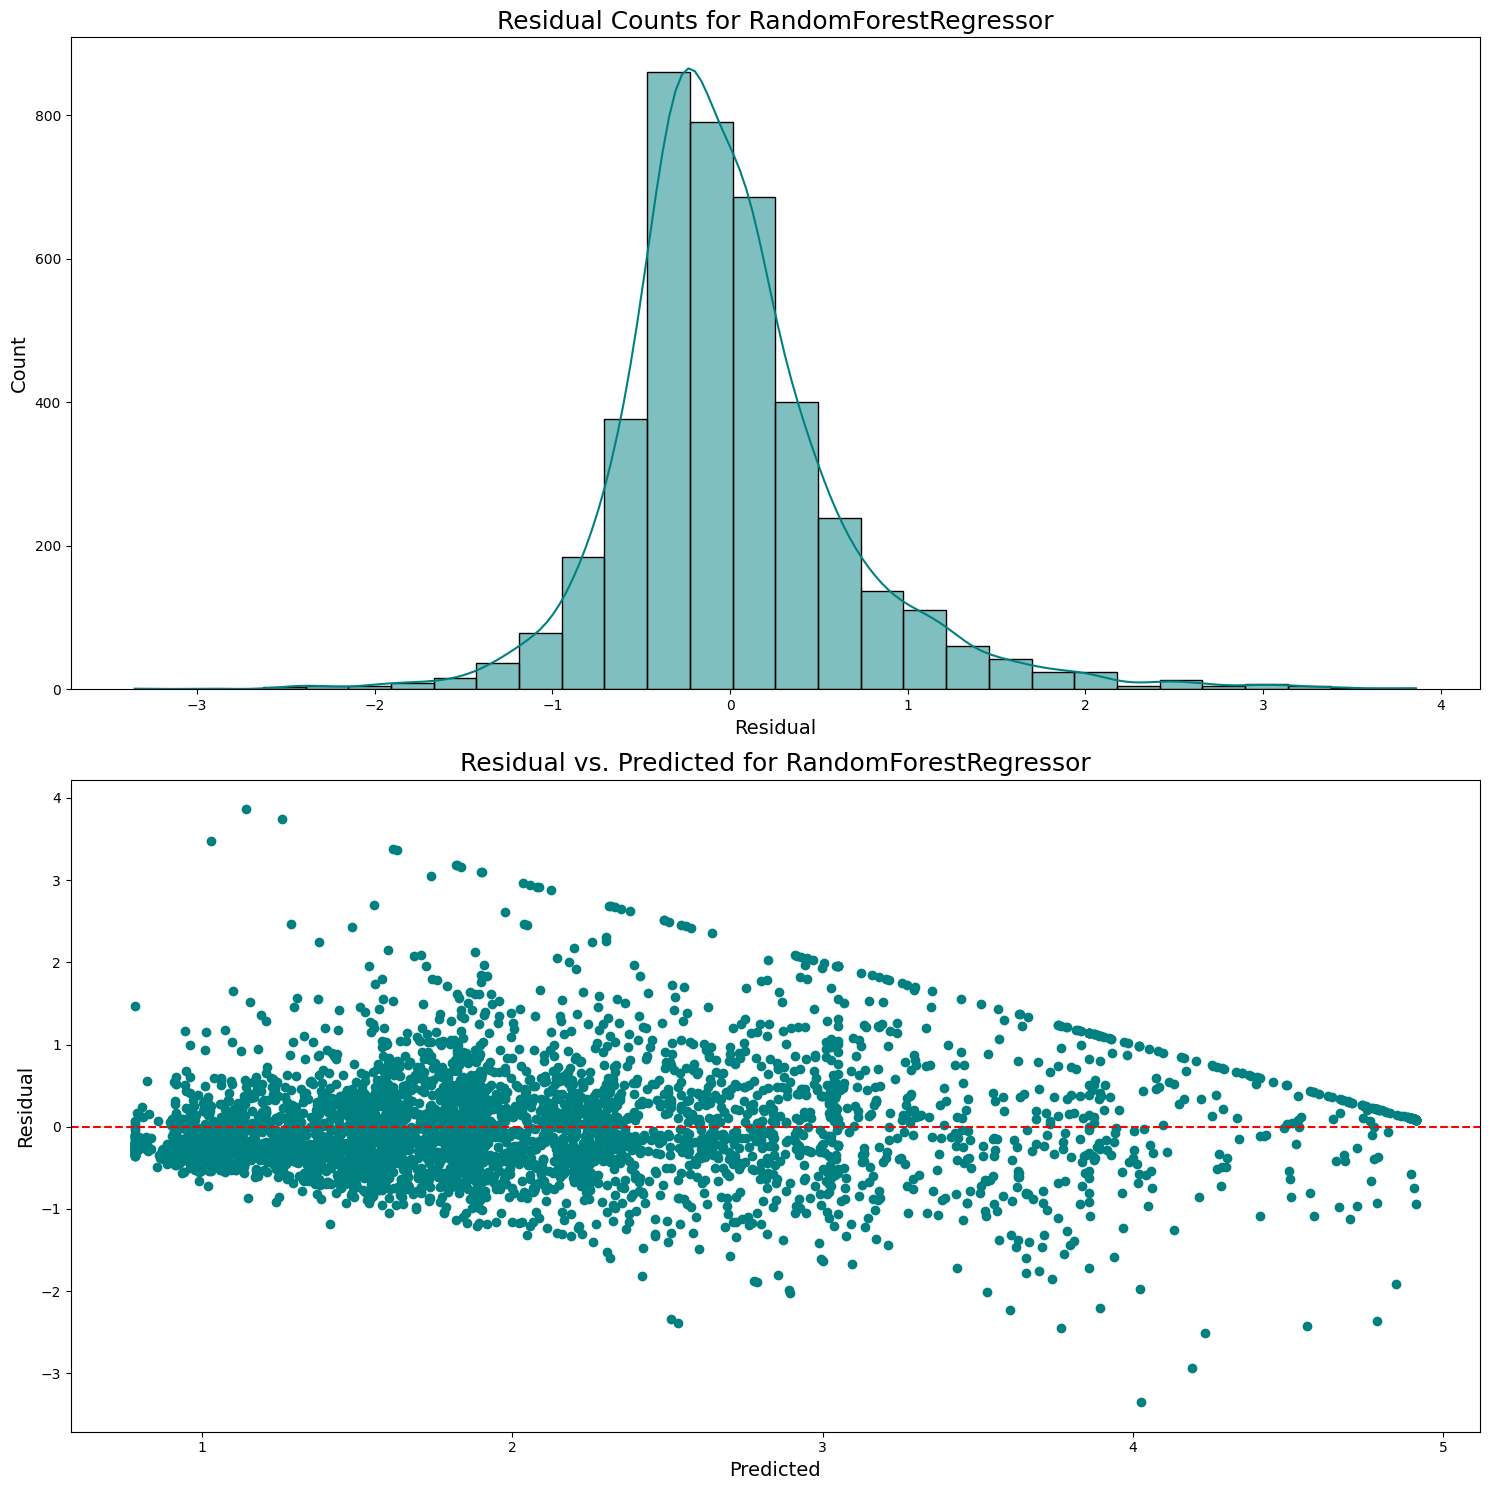


Cross Validation Scores:
[ 0.61954844 -1.70377988  0.62227637  0.62565804  0.65970635  0.68401768
  0.63284087  0.06491189  0.56082422  0.35897808  0.60748047  0.55793376]

Mean Cross Validation Score:
0.3575330239842263

Root Mean Squared Error (RMSE):
0.648261109047893

R² Score:
0.6793043450693232

Evaluating AdaBoostRegressor...


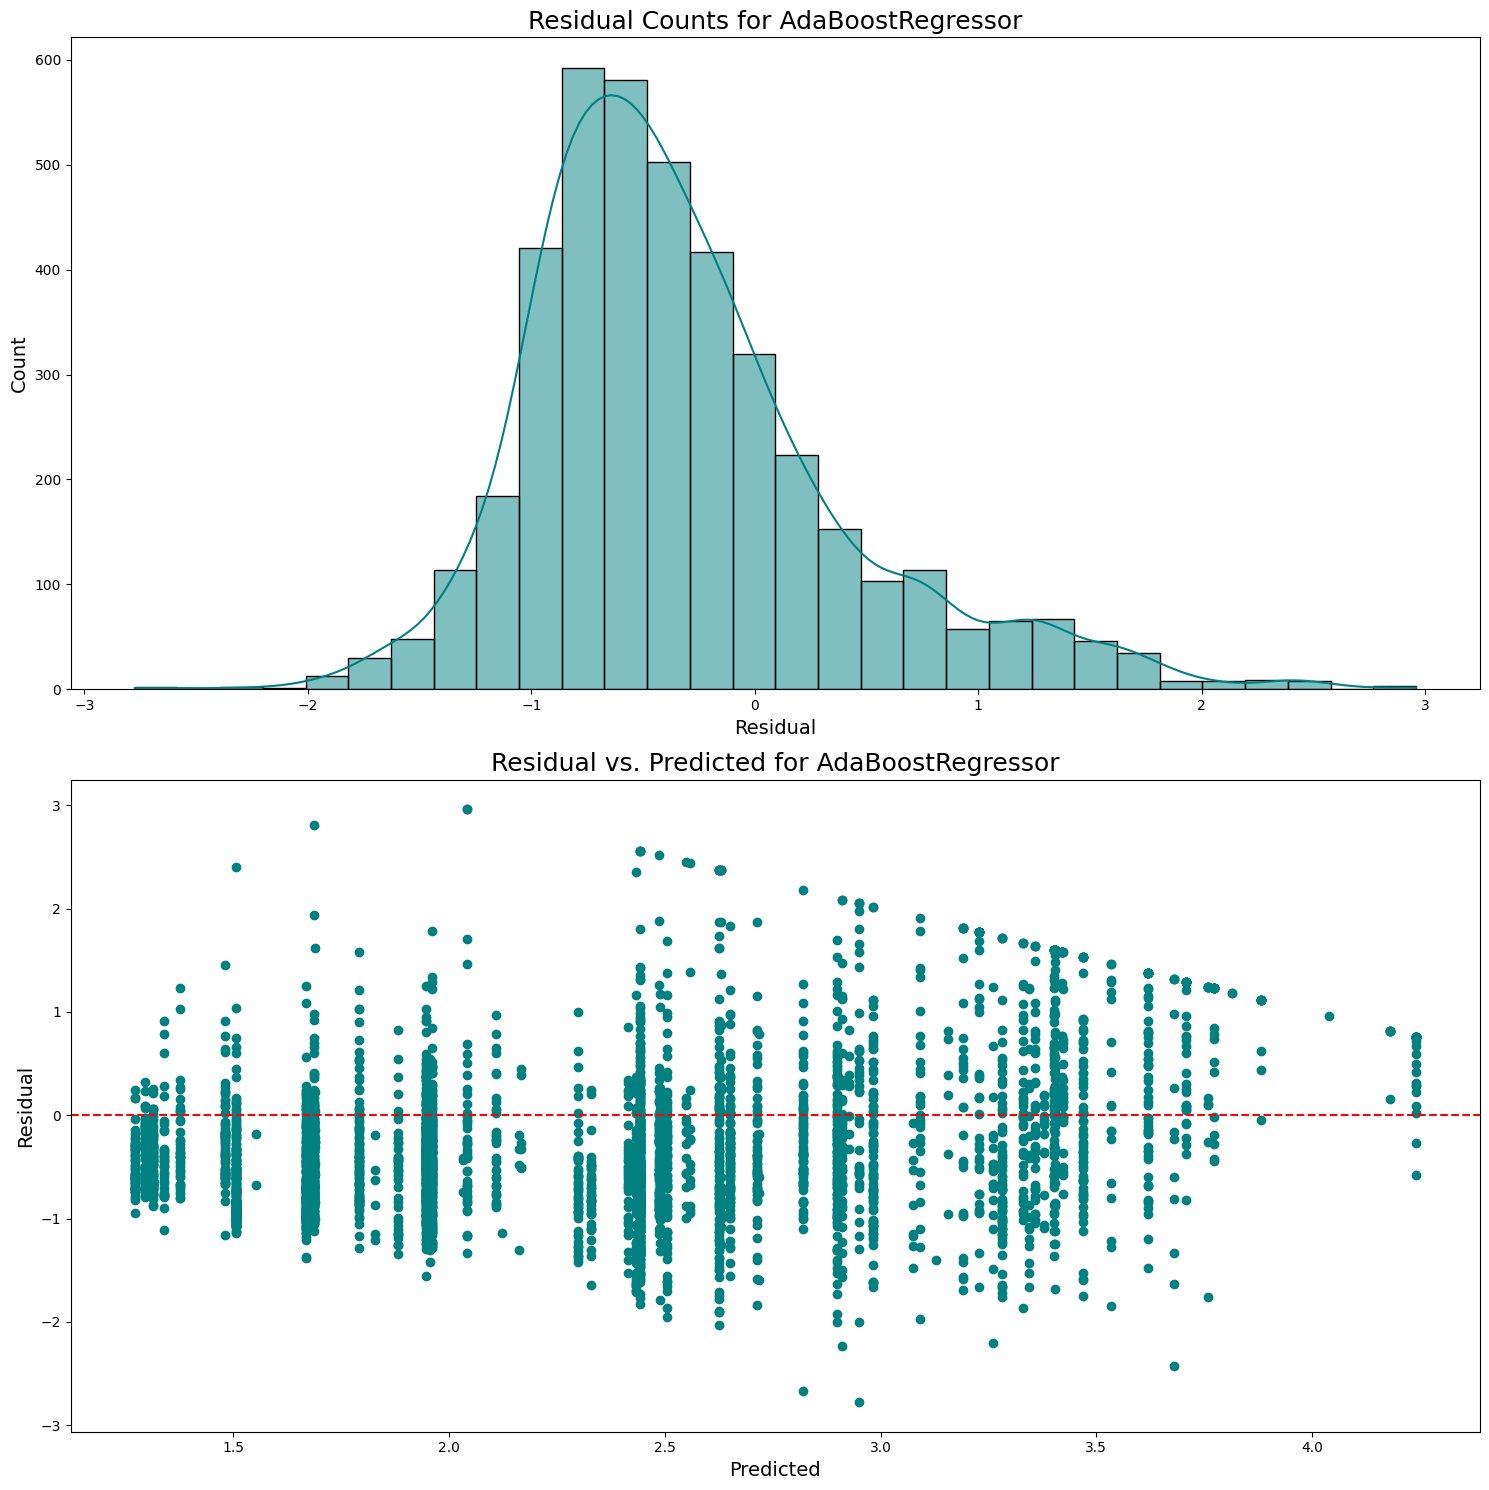


Cross Validation Scores:
[ 0.13796748 -3.73901834  0.28135176  0.50373151 -0.1392038   0.57549928
  0.36792995 -1.32000302  0.27910885  0.53362918  0.52570636  0.06176018]

Mean Cross Validation Score:
-0.16096171849012855

Root Mean Squared Error (RMSE):
0.7838867644198962

R² Score:
0.5310788695468394


In [559]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

# Example dataset (replace with your own)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
Y = data.target

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(loss='squared_error', max_depth=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    residual = Y_test - predicted
    r2 = r2_score(Y_test, predicted)

    # Visualization of residuals
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(211)
    sns.histplot(residual, kde=True, color='teal', bins=30)
    plt.title(f'Residual Counts for {name}', fontsize=18)
    plt.xlabel('Residual', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    ax2 = plt.subplot(212)
    plt.scatter(predicted, residual, color='teal')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual vs. Predicted for {name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Performance Metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    scores = cross_val_score(model, X, Y, cv=12)

    print('\nCross Validation Scores:')
    print(scores)
    print('\nMean Cross Validation Score:')
    print(scores.mean())
    print('\nRoot Mean Squared Error (RMSE):')
    print(rmse)
    print('\nR² Score:')
    print(r2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

# Example dataset (replace with your own)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
Y = data.target

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(loss='squared_error', max_depth=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    residual = Y_test - predicted
    r2 = r2_score(Y_test, predicted)

    # Visualization of residuals
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(211)
    sns.histplot(residual, kde=True, color='teal', bins=30)
    plt.title(f'Residual Counts for {name}', fontsize=18)
    plt.xlabel('Residual', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    ax2 = plt.subplot(212)
    plt.scatter(predicted, residual, color='teal')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual vs. Predicted for {name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Performance Metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    scores = cross_val_score(model, X, Y, cv=12)

    print('\nCross Validation Scores:')
    print(scores)
    print('\nMean Cross Validation Score:')
    print(scores.mean())
    print('\nRoot Mean Squared Error (RMSE):')
    print(rmse)
    print('\nR² Score:')
    print(r2)


Evaluating SVR (Linear Kernel)...


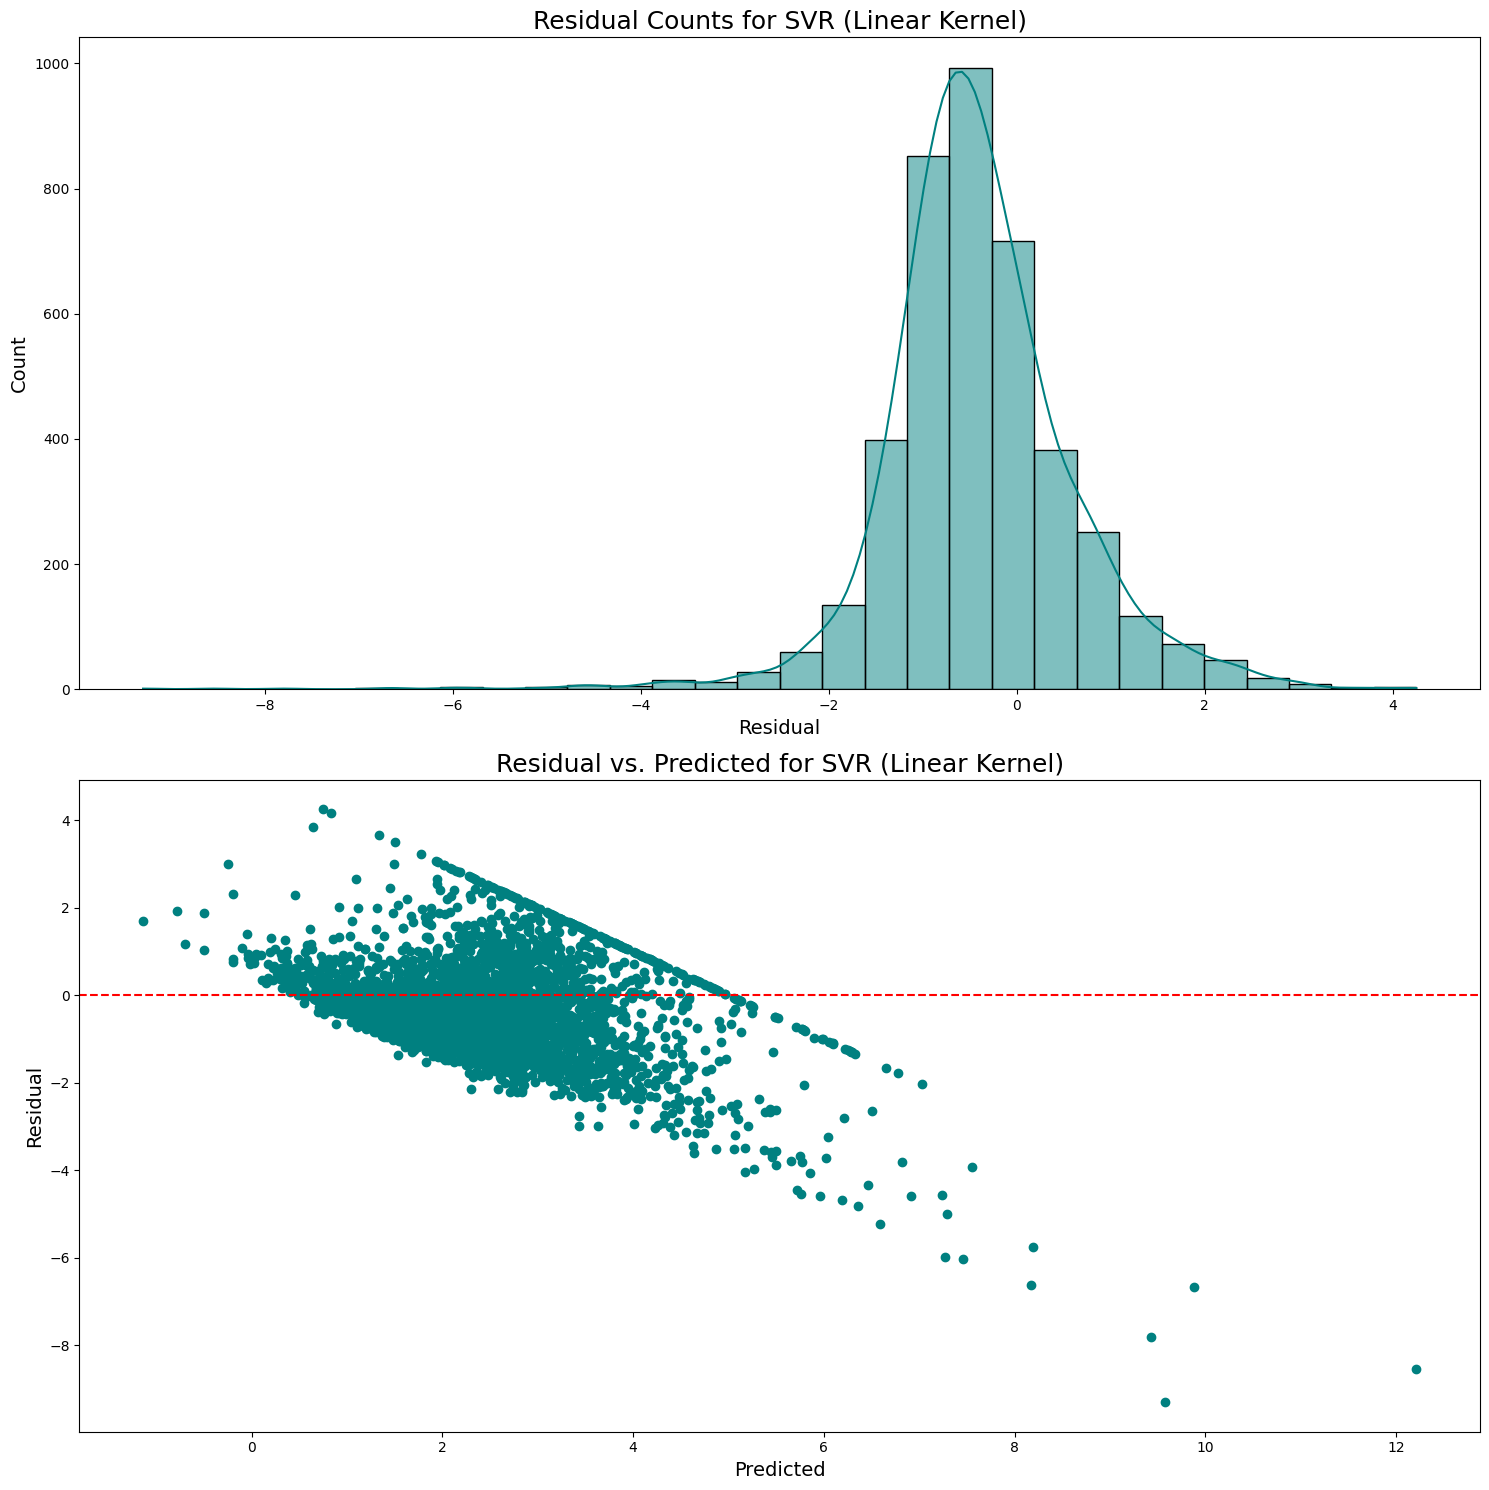

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing

# Load example data

# Split data into train and test sets


# Define SVR model to evaluate
models = {
    'SVR (Linear Kernel)': SVR(kernel='linear', C=1.0),
    'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, gamma=0.1),
    'SVR (Poly Kernel)': SVR(kernel='poly', degree=2, C=1.0)
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    residual = Y_test - predicted
    r2 = r2_score(Y_test, predicted)

    # Visualization of residuals
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(211)
    sns.histplot(residual, kde=True, color='teal', bins=30)
    plt.title(f'Residual Counts for {name}', fontsize=18)
    plt.xlabel('Residual', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    ax2 = plt.subplot(212)
    plt.scatter(predicted, residual, color='teal')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual vs. Predicted for {name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Performance Metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    scores = cross_val_score(model, X, Y, cv=12)

    print('\nCross Validation Scores:')
    print(scores)
    print('\nMean Cross Validation Score:')
    print(scores.mean())
    print('\nRoot Mean Squared Error (RMSE):')
    print(rmse)
    print('\nR² Score:')
    print(r2)

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
df_t = pd.read_csv("urls2.csv")

In [9]:
import requests
from bs4 import BeautifulSoup

def scrap_car_data(ad_url):
    # Ajouter des headers pour éviter le blocage
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    try:
        # Faire la requête HTTP avec les headers
        r = requests.get(ad_url, headers=headers)
        r.raise_for_status()  # Vérifie si la requête a réussi

        # Parser le contenu HTML de la page
        soup = BeautifulSoup(r.text, "html.parser")

        # Initialiser un dictionnaire pour stocker les informations de la voiture
        car_data = {}


        # Extraire les informations spécifiques du <div> avec la classe "sc-6p5md9-1 ksqQXN"
        other_info_tags = soup.find_all("div", {"class": "detail_line"})
        other_info = [tag.get_text(strip=True) for tag in other_info_tags]
        car_data['other_info'] = other_info

        # Extraire le prix de la voiture
        price_tag = soup.find("div", {"class": "color_primary text_bold price-block"})
        if price_tag:
            car_data['price'] = price_tag.get_text(strip=True)

        return car_data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête pour l'URL {ad_url}: {e}")
        return None

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrap_car_data(ad_url):
    # Ajouter des headers pour éviter le blocage
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    try:
        # Faire la requête HTTP avec les headers
        r = requests.get(ad_url, headers=headers)
        r.raise_for_status()  # Vérifie si la requête a réussi

        # Parser le contenu HTML de la page
        soup = BeautifulSoup(r.text, "html.parser")

        # Initialiser un dictionnaire pour stocker les informations de la voiture
        car_data = {}


        # Extraire les informations spécifiques du <div> avec la classe "sc-6p5md9-1 ksqQXN"
        other_info_tags = soup.find_all("div", {"class": "detail_line"})
        for 
        other_info = [tag.get_text(strip=True) for tag in other_info_tags]
        car_data['other_info'] = other_info

        # Extraire le prix de la voiture
        price_tag = soup.find("div", {"class": "color_primary text_bold price-block"})
        if price_tag:
            car_data['price'] = price_tag.get_text(strip=True)

        return car_data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête pour l'URL {ad_url}: {e}")
        return None

In [14]:
ad_url="https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/457115/land-rover-range-rover-evoque-.html"
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
    }


        # Faire la requête HTTP avec les headers
r = requests.get(ad_url, headers=headers)
r.raise_for_status()  # Vérifie si la requête a réussi

        # Parser le contenu HTML de la page
soup = BeautifulSoup(r.text, "html.parser")

        # Initialiser un dictionnaire pour stocker les informations de la voiture
car_data = {}


        # Extraire les informations spécifiques du <div> avec la classe "sc-6p5md9-1 ksqQXN"
other_info_tags = soup.find_all("div", {"class": "detail_line"})
print(other_info_tags)
print(other_info_tags.dtype())


[<div class="detail_line">
<span class="col-md-6 col-xs-6">Kilométrage</span>
<span class="text_bold">
						74 000					</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Année</span>
<span class="text_bold">  2021 </span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Boite de vitesses</span>
<span class="text_bold">
						Automatique					</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Carburant</span>
<span class="text_bold">
						Diesel					</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Date</span>
<span class="text_bold">
10-12-2024				</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Puissance fiscale</span>
<span class="text_bold">  8</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Nombre de portes</span>
<span class="text_bold">  5</span>
</div>, <div class="detail_line">
<span class="col-md-6 col-xs-6">Première main</span>
<span class=

AttributeError: ResultSet object has no attribute 'dtype'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [10]:
url="https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/457115/land-rover-range-rover-evoque-.html"
scrap_car_data(url)

{'other_info': ['Kilométrage74 000',
  'Année2021',
  'Boite de vitessesAutomatique',
  'CarburantDiesel',
  'Date10-12-2024',
  'Puissance fiscale8',
  'Nombre de portes5',
  'Première mainOui',
  'Véhicule dédouané2021']}

In [3]:
final_result = []
for url in df_t['url']:
    data = scrap_car_data(url)
    final_result.append(data)

In [4]:
final_result

[{'other_info': ['LAND-ROVER Range rover evoque',
   '74 000',
   '2021',
   'Automatique',
   'Diesel',
   '10-12-2024',
   '8',
   '5',
   'Oui',
   '2021']},
 {'other_info': ['JEEP Compass',
   '14 000',
   '2022',
   'Automatique',
   'Diesel',
   '10-12-2024',
   '8',
   '5',
   'Oui',
   '2022']},
 {'other_info': ['FIAT 500',
   '14 000',
   '2022',
   'Automatique',
   'Essence',
   '10-12-2024',
   '6',
   '3',
   '2022']},
 {'other_info': ['BMW Serie 8',
   'Oui',
   '19 000',
   '2022',
   'Automatique',
   'Essence',
   '10-12-2024',
   '41',
   '3',
   'Oui',
   '2022']},
 {'other_info': ['BMW Serie 4',
   'Oui',
   '4 000',
   '2024',
   'Automatique',
   'Diesel',
   '10-12-2024',
   '8',
   '5',
   'Oui',
   '2024']},
 {'other_info': ['ASTON-MARTIN Vantage',
   '9 000',
   '2023',
   'Automatique',
   'Essence',
   '10-12-2024',
   '23',
   '5',
   'Oui',
   '2023']},
 {'other_info': ['BENTLEY Bentayga',
   'Oui',
   '4 000',
   '2023',
   'Automatique',
   'Essence',
  

In [7]:
import csv
# Nom des colonnes pour le fichier CSV
columns = ['Marque', 'Kilométrage', 'Année', 'Boite de vitesses', 'Carburant', 'Date',
           'Puissance fiscale', 'Nombre de portes', 'Première main', 'Véhicule dédouané', 'Prix']

# Création du fichier CSV
with open('voitures.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(columns)  # Écrire les en-têtes
    
    for item in final_result:
        other_info = item.get('other_info', [])
        price = item.get('price', 'Non spécifié')
        
        # Compléter les données manquantes
        row = other_info + [price]
        while len(row) < len(columns):
            row.append('Non spécifié')
        
        writer.writerow(row)

print("Fichier CSV 'voitures.csv' généré avec succès.")



Fichier CSV 'voitures.csv' généré avec succès.


In [8]:
df2=pd.read_csv("voitures.csv")

ParserError: Error tokenizing data. C error: Expected 11 fields in line 5, saw 12


In [15]:

import requests
from bs4 import BeautifulSoup

def scrap_car_data(ad_url):
    # Ajouter des headers pour éviter le blocage
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, lik Gecko) Chrome/113.0.0.0 Safari/537.36'
    }

    try:
        # Faire la requête HTTP avec les headers
        r = requests.get(ad_url, headers=headers)
        r.raise_for_status()  # Vérifie si la requête a réussi

        # Parser le contenu HTML de la page
        soup = BeautifulSoup(r.text, "html.parser")

        # Initialiser un dictionnaire pour stocker les informations de la voiture
        car_data = {}
        
        links= soup.find_all('a')
        link = [tag.get_text(strip=True) for tag in links]
        car_data['marque']=link[58]
        car_data['modèle']=link[59]
        info_divs = soup.find_all('div', class_='detail_line')
        for div in info_divs:
            # Trouver les deux span dans chaque div
            key = div.find('span', class_='col-md-6 col-xs-6').get_text().strip()
            value = div.find('span', class_='text_bold').get_text().strip()
            
            car_data[key] = value

        # Extraire le prix de la voiture
        price_tag = soup.find("div", {"class": "color_primary text_bold price-block"})
        if price_tag:
            car_data['price'] = price_tag.get_text(strip=True)

        return car_data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête pour l'URL {ad_url}: {e}")
        return None

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
df_t = pd.read_csv("urls2.csv")

In [18]:
final_result = []
for url in df_t['url']:
    data = scrap_car_data(url)
    final_result.append(data)

Erreur lors de la requête pour l'URL https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/461011/jeep-grand-cherokee-.html: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Erreur lors de la requête pour l'URL https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/443864/dacia-logan-.html: HTTPSConnectionPool(host='www.moteur.ma', port=443): Max retries exceeded with url: /fr/voiture/achat-voiture-occasion/detail-annonce/443864/dacia-logan-.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F39151A950>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Erreur lors de la requête pour l'URL https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/461273/volkswagen-polo-.html: HTTPSConnectionPool(host='www.moteur.ma', port=443): Max retries exceeded with url: /fr/voiture/achat-voiture-occasion/detail-annonce/461273/volkswagen-polo-.html

In [16]:
import pandas as pd

# Assuming 'final_result' is the list of dictionaries you have from the previous code
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(final_result)

# Save the DataFrame to a CSV file
df.to_csv('car_data.csv', index=False)